In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gurobipy import *

In [2]:
# CityName_Latitude_Longitude

data =  [["Delhi", 28.7041, 77.1025], 
         ["Mumbai", 19.0760, 72.8777], 
         ["Hyderabad", 17.3850, 78.4867],
         ["Chennai", 11.7826, 77.8007],
         ["Surat", 21.1702, 72.8311],
         ["Kolkata", 22.5726, 88.3639],
         ["Patna", 25.5941, 85.1376],
         ["Nagpur", 21.1458, 79.0882],
         ["Chandigarh", 30.7333, 76.7794],
         ["Assam", 26.2006, 92.9376],
         ["Bangalore", 12.9716, 77.5946],
         ["Bhopal", 23.2599, 77.4126]]

In [3]:
airports_df = pd.DataFrame(data = data, columns = ["City","X","Y"])
airports_df

,City,X,Y
0,Delhi,28.7041,77.1025
1,Mumbai,19.0760,72.8777
2,Hyderabad,17.3850,78.4867
3,Chennai,11.7826,77.8007
4,Surat,21.1702,72.8311
5,Kolkata,22.5726,88.3639
6,Patna,25.5941,85.1376
7,Nagpur,21.1458,79.0882
8,Chandigarh,30.7333,76.7794
9,Assam,26.2006,92.9376


In [4]:
#no_of_clusters = int(input("How wany clusters to look for ? "))
no_of_clusters = 4

In [5]:
hubs = ["Delhi","Mumbai","Kolkata","Bangalore"]
def hub(i):
    if i > no_of_clusters:
        return
    ch = input("Enter airport's name : ").capitalize()
    if ch in list(airports_df.City):
        major_airports.append(ch)
        hub(i+1)
    else:
        print("\tEnter correct airport's name...Retry")
        hub(i)
#hub(1)

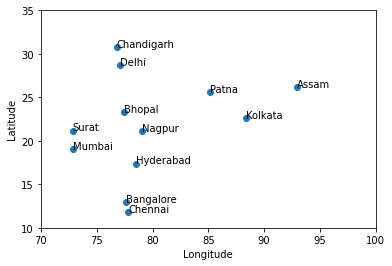

In [6]:
plt.scatter(airports_df.Y,airports_df.X)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim((70,100))
plt.ylim((10,35))
for i,j in enumerate(airports_df.City):
    plt.annotate(j, (airports_df.Y[i],airports_df.X[i]))

In [7]:
def distance_calculator(x1,y1,x2,y2):
    a = np.square(np.array(x1-x2)*110)
    b = np.square(np.array(y1-y2)*100)
    return np.sqrt(a+b)

distance = np.zeros((airports_df.shape[0],airports_df.shape[0]), dtype = "int32")
for i in range(airports_df.shape[0]):
    for j in range(airports_df.shape[0]):
        distance[i,j] = distance_calculator(airports_df.X[i],airports_df.Y[i],airports_df.X[j],airports_df.Y[j])
    #distance[i] = np.sqrt(np.square(np.array(airports_df.X[i]-airports_df.X)*110) + np.square(np.array(airports_df.Y[i]-airports_df.Y)*100))
distance

array([[   0, 1140, 1252, 1862,  932, 1312,  873,  854,  225, 1607, 1731,
         599],
       [1140,    0,  590,  941,  230, 1595, 1420,  661, 1340, 2153,  820,
         646],
       [1252,  590,    0,  620,  702, 1140, 1121,  418, 1478, 1740,  493,
         655],
       [1862,  941,  620,    0, 1145, 1588, 1687, 1037, 2087, 2192,  132,
        1263],
       [ 932,  230,  702, 1145,    0, 1560, 1323,  625, 1123, 2085, 1019,
         512],
       [1312, 1595, 1140, 1588, 1560,    0,  463,  940, 1465,  607, 1508,
        1097],
       [ 873, 1420, 1121, 1687, 1323,  463,    0,  778, 1009,  782, 1580,
         814],
       [ 854,  661,  418, 1037,  625,  940,  778,    0, 1079, 1492,  911,
         286],
       [ 225, 1340, 1478, 2087, 1123, 1465, 1009, 1079,    0, 1690, 1955,
         824],
       [1607, 2153, 1740, 2192, 2085,  607,  782, 1492, 1690,    0, 2114,
        1585],
       [1731,  820,  493,  132, 1019, 1508, 1580,  911, 1955, 2114,    0,
        1131],
       [ 599,  646,  

In [8]:
clusters = [[index] for i in hubs for index,j in enumerate(airports_df.City) if i==j]

def feasible_cluster(d):
    c = []
    pos = np.argsort(d)
    c.append(pos[0])
    for i in range(no_of_clusters-1):
        if d[pos[i+1]] - d[pos[0]] <= 100 :
            c.append(pos[i+1])
    return c
    

for i in range(airports_df.shape[0]):
    if airports_df.City[i] in hubs:
        continue
    else:
        d = []
        for j in clusters:
            d.append(int(distance[i][j[0]]))
        pos = np.argmin(d)
        cs = feasible_cluster(d)
        for k in cs:
            clusters[k].append(i)

#airports_df["Group"] = [i for j in range(airports_df.shape[0]) for i in range(no_of_clusters) if j in clusters[i]]
airports_df["Group"] = [i for i in range(airports_df.shape[0]) ]
for i in range(airports_df.shape[0]):
    for j in range(no_of_clusters):
        if i in clusters[j]:
            airports_df["Group"][i] = j
            
#for i in range(airports_df.shape[0]):
#    if i not in clusters:
#        airports_df["Group"] = 4
print(clusters)

[[0, 8, 11], [1, 2, 4, 7, 11], [5, 6, 9], [10, 2, 3]]


<ipython-input-8-792da266ebb0>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airports_df["Group"][i] = j


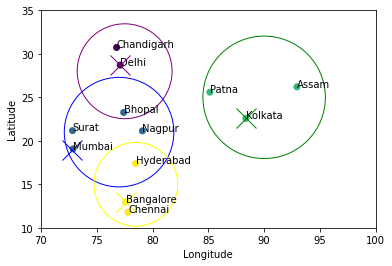

In [9]:
plt.scatter(airports_df.Y,airports_df.X,c = np.array(airports_df["Group"])/(no_of_clusters-1))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim((70,100))
plt.ylim((10,35))
plt.plot(77.1,28.7, marker = "x", markersize = 20, markeredgecolor = "purple")
plt.plot(72.8,19, marker = "x", markersize = 20, markeredgecolor = "blue")
plt.plot(88.36,22.57, marker = "x", markersize = 20, markeredgecolor = "green")
plt.plot(77.59,12.97, marker = "x", markersize = 20, markeredgecolor = "yellow")
plt.scatter( 77, 21 , s=12000 ,  facecolors='none', edgecolors='blue' )
plt.scatter( 77.5, 28 , s=9000 ,  facecolors='none', edgecolors='purple' ) 
plt.scatter( 90, 25 , s=15000 ,  facecolors='none', edgecolors='green' ) 
plt.scatter( 78.5, 15 , s=7000 ,  facecolors='none', edgecolors='yellow' ) 

for i,j in enumerate(airports_df.City):
    plt.annotate(j, (airports_df.Y[i],airports_df.X[i]))
plt.show();

In [10]:
plt.Circle((77,21),radius = 5)
plt.show();

# Soft Clustering

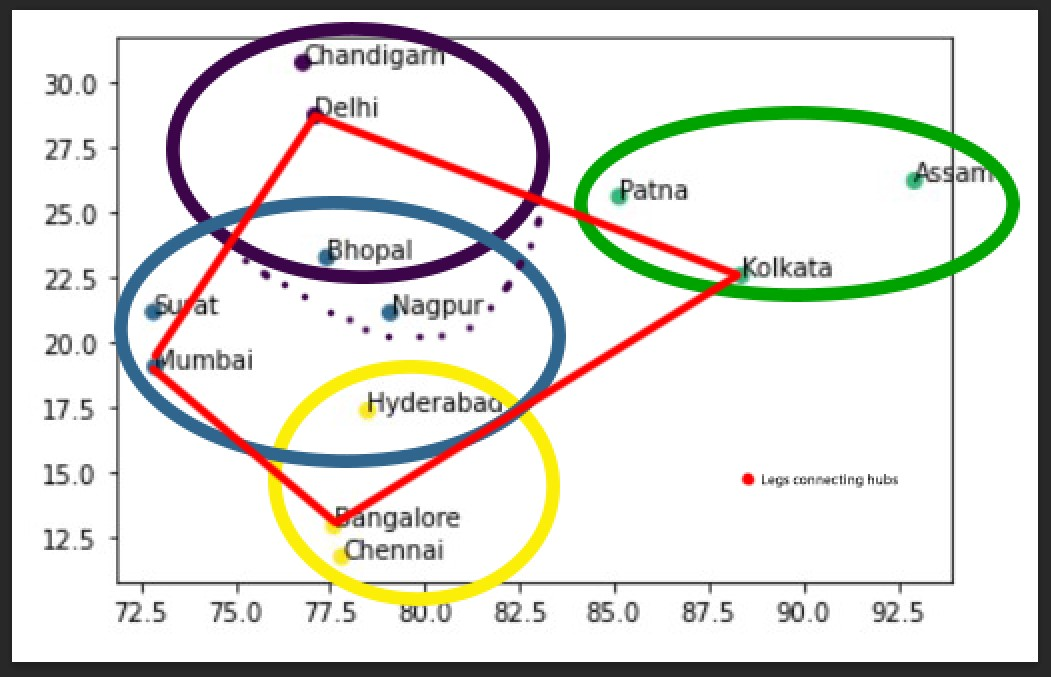

**Defining sub-centres : Common nodes between two clusters**

In our case Hyderabad and Bhopal are sub-centres.

**Fleets available at disposal**

In [11]:
fleet =  [["A", 250, 1300, 2, 1, 1], 
         ["B", 7500, 6600, 4, 900, 1.05], 
         ["D", 112760, 9600, 2, 10000, 0.99],
         ]
fleet_df = pd.DataFrame(data = fleet, columns = ["Type","Capacity","Range","Number","FixedCost","VariableCost"])
fleet_df

,Type,Capacity,Range,Number,FixedCost,VariableCost
0,A,250,1300,2,1,1.00
1,B,7500,6600,4,900,1.05
2,D,112760,9600,2,10000,0.99


# Assigning Planes to each Cluster

In [12]:
#Demand on the direct flight legs

#Assuming time period is 1 for these flights

demand =  [["Mumbai", "Delhi", 65000], 
           ["Mumbai", "Kolkata", 35000], 
           ["Mumbai", "Bangalore", 10000],
           ["Kolkata", "Delhi", 45000],
           ["Kolkata", "Mumbai", 25000],
           ["Kolkata", "Bangalore", 5000],
           ["Bangalore", "Delhi", 15000],
           ["Bangalore", "Kolkata", 6000],
           ["Bangalore", "Mumbai", 9000],
           ["Delhi", "Bangalore", 4000],
           ["Delhi", "Kolkata", 55000],
           ["Delhi", "Mumbai", 67000]
         ]
demand_df = pd.DataFrame(data = demand, columns = ["Origin","Destination","Tonnage"])

cum_dem =[]
count = 1
for i in hubs:
    for j in hubs[count:]:
        if i!=j:
            cum_dem.append([i,j,int(demand_df[demand_df.Origin == i][demand_df.Destination == j].Tonnage) + int(demand_df[demand_df.Origin == j][demand_df.Destination == i].Tonnage)])
    count = count + 1       
cum_dem_df = pd.DataFrame(data = cum_dem, columns = ["Airport1","Airport2","Tonnage"])
cum_dem_df.sort_values("Tonnage", ascending = False, inplace=True)
print("Cumulative Demand")
demand_df

Cumulative Demand


<ipython-input-12-82a3b2a35771>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cum_dem.append([i,j,int(demand_df[demand_df.Origin == i][demand_df.Destination == j].Tonnage) + int(demand_df[demand_df.Origin == j][demand_df.Destination == i].Tonnage)])


,Origin,Destination,Tonnage
0,Mumbai,Delhi,65000
1,Mumbai,Kolkata,35000
2,Mumbai,Bangalore,10000
3,Kolkata,Delhi,45000
4,Kolkata,Mumbai,25000
5,Kolkata,Bangalore,5000
6,Bangalore,Delhi,15000
7,Bangalore,Kolkata,6000
8,Bangalore,Mumbai,9000
9,Delhi,Bangalore,4000


In [13]:
mdl = Model('Best Fleet for each Leg')

L = range(demand_df.shape[0])

A = [(mdl.addVar(vtype = GRB.BINARY, name="A%s" % str([index])
               .format(index))) for index in L ]

B = [(mdl.addVar(vtype = GRB.BINARY, name="B%s" % str([index])
               .format(index))) for index in L ]

D = [(mdl.addVar(vtype = GRB.BINARY, name="D%s" % str([index])
               .format(index))) for index in L ]

nA = [(mdl.addVar(vtype = GRB.INTEGER, name="nA%s" % str([index])
               .format(index))) for index in L ]

nB = [(mdl.addVar(vtype = GRB.INTEGER, name="nB%s" % str([index])
               .format(index))) for index in L ]

nD = [(mdl.addVar(vtype = GRB.INTEGER, name="nD%s" % str([index])
               .format(index))) for index in L ]

fix = [(mdl.addVar(vtype = GRB.CONTINUOUS,name="fix%s" % str([i])
                   .format(i), lb = 0.0))
                   for i in L]

var = [(mdl.addVar(vtype = GRB.CONTINUOUS, name="var%s" % str([i])
                   .format(i), lb = 0.0))
                   for i in L]

mdl.update()

mdl.modelSense = GRB.MINIMIZE

mdl.setObjective(sum(mdl.getVarByName("fix"+str([i])) for i in L) 
                + sum(mdl.getVarByName("var"+str([i])) for i in L))

mdl.addConstrs( (mdl.getVarByName("nA"+str([i])) <= 2*mdl.getVarByName("A"+str([i])) for i in L), name="nA")
mdl.addConstrs( (mdl.getVarByName("nB"+str([i])) <= 4*mdl.getVarByName("B"+str([i])) for i in L), name="nB")
mdl.addConstrs( (mdl.getVarByName("nD"+str([i])) <= 2*mdl.getVarByName("D"+str([i])) for i in L), name="nC")

mdl.addConstrs((demand_df.Tonnage[i]-
                (mdl.getVarByName("nA"+str([i]))*int(fleet_df[fleet_df.Type == "A"].Capacity)+
                mdl.getVarByName("nB"+str([i]))*int(fleet_df[fleet_df.Type == "B"].Capacity)+
                mdl.getVarByName("nD"+str([i]))*int(fleet_df[fleet_df.Type == "D"].Capacity))
                <= 0 for i in L), name = "Capacity_Feasibility");

mdl.addConstrs((mdl.getVarByName("A"+str([i]))*
                (distance[k,j] - int(fleet_df[fleet_df.Type == "A"].Range)) <= 0 
                 for i in L for k in range(airports_df.shape[0]) for j in range(airports_df.shape[0])
                 if airports_df.City[k]==demand_df.Origin[i] and airports_df.City[j]==demand_df.Destination[i] ), name = "Range_Feasibility_A");

mdl.addConstrs((mdl.getVarByName("B"+str([i]))*
                (distance[k,j] - int(fleet_df[fleet_df.Type == "B"].Range)) <= 0 
                 for i in L for k in range(airports_df.shape[0]) for j in range(airports_df.shape[0])
                 if airports_df.City[k]==demand_df.Origin[i] and airports_df.City[j]==demand_df.Destination[i] ), name = "Range_Feasibility_B");

mdl.addConstrs((mdl.getVarByName("D"+str([i]))*
                (distance[k,j] - int(fleet_df[fleet_df.Type == "D"].Range)) <= 0 
                 for i in L for k in range(airports_df.shape[0]) for j in range(airports_df.shape[0])
                 if airports_df.City[k]==demand_df.Origin[i] and airports_df.City[j]==demand_df.Destination[i] ), name = "Range_Feasibility_D");

mdl.addConstrs((mdl.getVarByName("nA"+str([i]))*int(fleet_df[fleet_df.Type == "A"].FixedCost) + 
                mdl.getVarByName("nB"+str([i]))*int(fleet_df[fleet_df.Type == "B"].FixedCost) + 
                mdl.getVarByName("nD"+str([i]))*int(fleet_df[fleet_df.Type == "D"].FixedCost)
                == mdl.getVarByName("fix"+str([i])) for i in L), name = "Fixed");

mdl.addConstrs((mdl.getVarByName("var"+str([i])) == (
                mdl.getVarByName("A"+str([i]))*int(fleet_df[fleet_df.Type == "A"].VariableCost) + 
                mdl.getVarByName("B"+str([i]))*int(fleet_df[fleet_df.Type == "B"].VariableCost) + 
                mdl.getVarByName("D"+str([i]))*int(fleet_df[fleet_df.Type == "D"].VariableCost))*demand_df.Tonnage[i]  for i in L), name = "Variable");

mdl.update()
mdl.optimize()

Academic license - for non-commercial use only - expires 2022-02-17
Using license file C:\Users\Rishav\gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 108 rows, 96 columns and 228 nonzeros
Model fingerprint: 0x919e9937
Variable types: 24 continuous, 72 integer (36 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e+03, 7e+04]
Presolve removed 108 rows and 96 columns
Presolve time: 0.03s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.05 seconds
Thread count was 1 (of 12 available processors)

Solution count 1: 107700 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.077000000000e+05, best bound 1.077000000000e+05, gap 0.0000%


In [14]:
print("Which planes are the best for the given cargo demand?\n")

for i in L:
    print(i,"th load going from",demand_df.Origin[i],"to",demand_df.Destination[i]," :","\t",int(mdl.getVarByName("nA"+str([i])).x),int(mdl.getVarByName("nB"+str([i])).x),int(mdl.getVarByName("nD"+str([i])).x))

Which planes are the best for the given cargo demand?

0 th load going from Mumbai to Delhi  : 	 0 0 1
1 th load going from Mumbai to Kolkata  : 	 0 0 1
2 th load going from Mumbai to Bangalore  : 	 0 0 1
3 th load going from Kolkata to Delhi  : 	 0 0 1
4 th load going from Kolkata to Mumbai  : 	 0 0 1
5 th load going from Kolkata to Bangalore  : 	 0 1 0
6 th load going from Bangalore to Delhi  : 	 0 0 1
7 th load going from Bangalore to Kolkata  : 	 0 1 0
8 th load going from Bangalore to Mumbai  : 	 0 0 1
9 th load going from Delhi to Bangalore  : 	 0 1 0
10 th load going from Delhi to Kolkata  : 	 0 0 1
11 th load going from Delhi to Mumbai  : 	 0 0 1


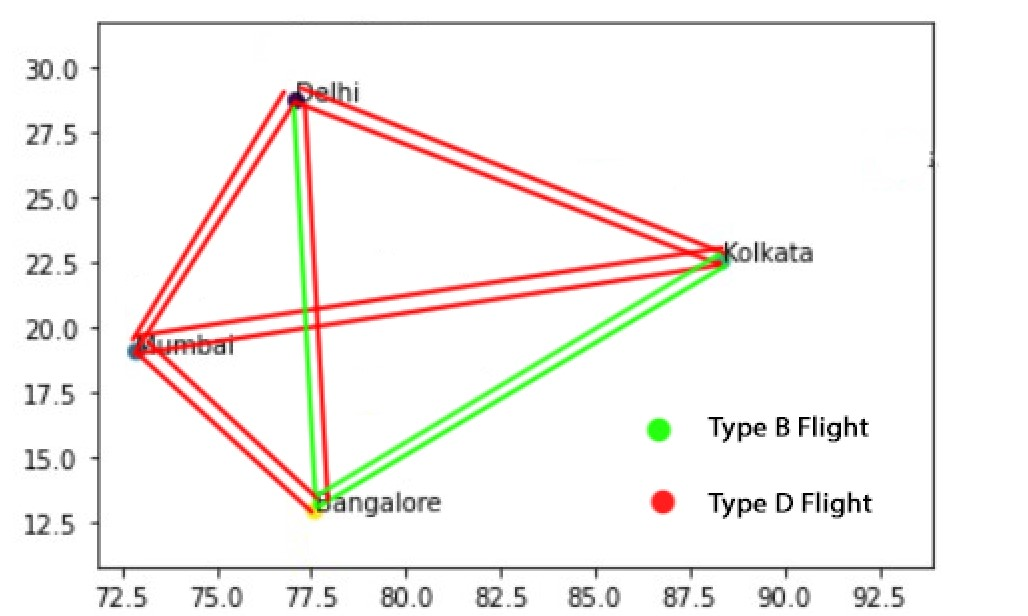

**1.1. Fixed Flights**

a) These will be direct routes connecting the major airport of each cluster.

       (Mumbai -> Delhi), (Mumbai -> Kolkata), (Bangalore -> Delhi) etc.

Generating possible routes for the direct routes

a) Minimising Costs

b) Near equal utilisation of each aircraft

**Experience tells that each plan can run at max 'N' trips a day**

In [15]:
#N = int(input("How many trips a plane can make in a day ? "))
N = 4

**Step: Develop sub-clusters such that each demand can be satisfied.**

In [16]:
hubs_index = [i for i in range(airports_df.shape[0]) if airports_df.City[i] in hubs]

max_itinaries = 2

def cargo_flow_path(b,ix,orig,dest):
    list = []
    def feasible(orig,dest,j):
        e = 0.70#eccentricity
        a = np.sqrt(np.square(airports_df.X[orig]-airports_df.X[dest])+np.square(airports_df.Y[orig]-airports_df.Y[dest]))/(2*e)
        b = np.sqrt(a*a-np.square(a*e))
        xx = airports_df.X[j] - (airports_df.X[orig]+airports_df.X[dest])/2
        yy = airports_df.Y[j] - (airports_df.Y[orig]+airports_df.Y[dest])/2
        
        s = np.square(yy/a) + np.square(xx/b)
        if s<=1:
            return True
        else:
            return False
    
    def f(lt,ix):
        if ix == 0:
            list.append(lt.copy()) 
        else :
            for j in b:
                if len(lt) == 0 and feasible(orig,dest,j):
                    lt2 = lt.copy()
                    lt2.append(j)
                    f(lt2.copy(),ix-1)
                    
                elif len(lt) > 0 and j not in lt and feasible(airports_df.City[lt[-1]],dest,j):
                    lt2 = lt.copy()
                    lt2.append(j)
                    f(lt2.copy(),ix-1)

    f(list.copy(),ix)
    return list
                

def cargo_path_generator(index):
    orig = [i for i in hubs_index if demand_df.Origin[index] == airports_df.City[i]] 
    dest = [j for j in hubs_index if demand_df.Destination[index] == airports_df.City[j]]
    b = [i for i in hubs_index if i not in orig and i not in dest]
    paths = []
    paths.append([orig[0],dest[0]])
    for i in range(min(max_itinaries,len(hubs_index)-2)):
        if i==0:
            continue
        else:
            P = cargo_flow_path(b,i,orig[0],dest[0])
            for p in P:
                list = []
                list.append(orig[0])
                for z in p:
                    list.append(z)
                list.append(dest[0])
                paths.append(list)
            
    return paths

paths = [[] for i in range(demand_df.shape[0])]
for i in range(demand_df.shape[0]):
    paths[i] = cargo_path_generator(i)


In [17]:
demand_df["Paths"] = paths
demand_df

,Origin,Destination,Tonnage,Paths
0,Mumbai,Delhi,65000,"[[1, 0]]"
1,Mumbai,Kolkata,35000,"[[1, 5]]"
2,Mumbai,Bangalore,10000,"[[1, 10]]"
3,Kolkata,Delhi,45000,"[[5, 0]]"
4,Kolkata,Mumbai,25000,"[[5, 1]]"
5,Kolkata,Bangalore,5000,"[[5, 10], [5, 1, 10]]"
6,Bangalore,Delhi,15000,"[[10, 0], [10, 1, 0]]"
7,Bangalore,Kolkata,6000,"[[10, 5], [10, 1, 5]]"
8,Bangalore,Mumbai,9000,"[[10, 1]]"
9,Delhi,Bangalore,4000,"[[0, 10], [0, 1, 10]]"


In [18]:
max_no_sub_clusters = int((demand_df.shape[0]/N))
print("Max number of sub-clusters ~ Max number of planes needed")
max_no_sub_clusters

Max number of sub-clusters ~ Max number of planes needed


3

In [19]:
count = 0
for i in demand_df.Paths:
    if len(i)==1:
        count = count + 1
min_no_sub_clusters = int((count/N))
print("Min number of sub-clusters ~ Min number of planes needed")
min_no_sub_clusters

Min number of sub-clusters ~ Min number of planes needed


2

For our particular case, Analysis and Experience tells the planner that the routes can be satisfied by set of planes [**2 Type D**].

In [20]:
d_plane =  [[1,"D","Mumbai"], 
            [2,"D","Kolkata"]
           ]
d_plane_df = pd.DataFrame(data = d_plane, columns = ["Index","type","Origin"])
d_plane_df

,Index,type,Origin
0,1,D,Mumbai
1,2,D,Kolkata


Assumption: Only cyclic flight routes are considered.

**1. Combine all single-legged options together to form the longest possible chain/cycle. (Category A)**

**2. Check the feasibility of the multi-legged routes with respect to the biggest aircraft possible on that route. If not, reject them. If for such an od pair no multi-legged alternative exists add the direct link. (Category A)**

**3. See if the multi-legged paths are reflected in the chains. If not add them at the necessary locations. (Category B)**

**4. Generate all possible "N" sub-clusters around the feasible multi-legged chains keeping in mind the maximum number of trips that can be covered.**

**Generate all the routes for the two Type D planes utilised in the direct flights.**

**For a T-day period copy the routes T times.**

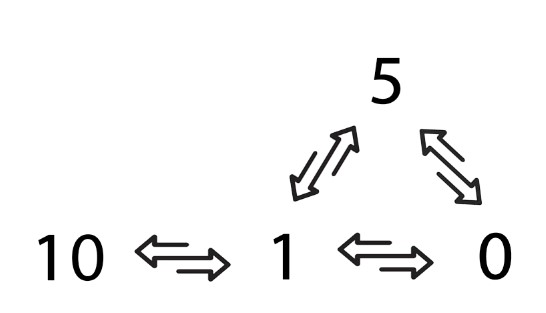

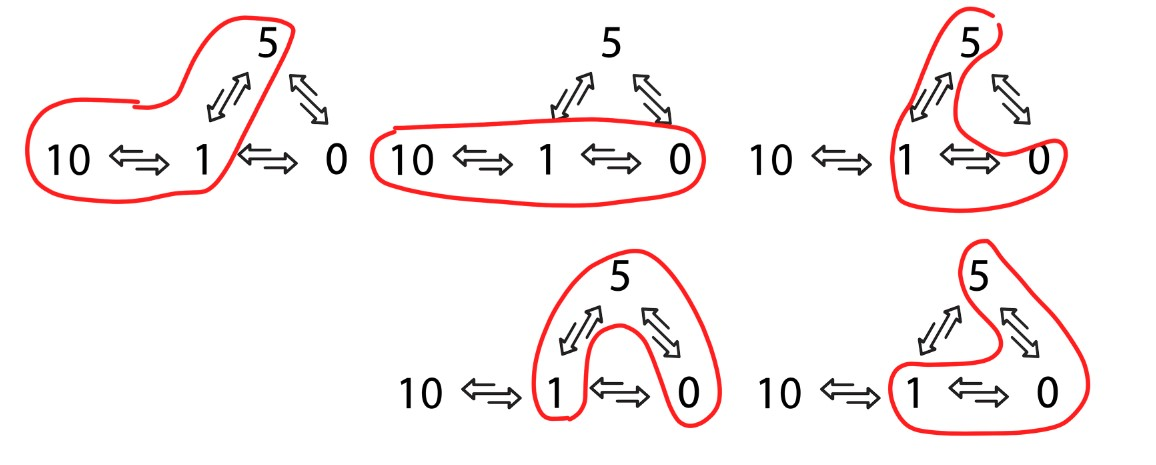

In [21]:
#routes for 
routes = [[(1,5,1,10,1),(1,10,1,5,1),(1,10,1,0,1),(1,0,1,10,1),(1,5,1,0,1),(1,0,1,5,1),(1,5,0,5,1),(1,0,5,0,1)],
        [(5,1,10,1,5),(5,1,0,1,5),(5,1,5,0,5),(5,0,5,1,5),(5,0,1,0,5)]
        ]
r = pd.DataFrame(routes)
r

,0,1,2,3,4,5,6,7
0,"(1, 5, 1, 10, 1)","(1, 10, 1, 5, 1)","(1, 10, 1, 0, 1)","(1, 0, 1, 10, 1)","(1, 5, 1, 0, 1)","(1, 0, 1, 5, 1)","(1, 5, 0, 5, 1)","(1, 0, 5, 0, 1)"
1,"(5, 1, 10, 1, 5)","(5, 1, 0, 1, 5)","(5, 1, 5, 0, 5)","(5, 0, 5, 1, 5)","(5, 0, 1, 0, 5)",None,None,None


# The remaining fleet is :

**Assigning flights to local clusters**

**2.1. Local Flights**

a) All minor airports will be shipping cargo to be sent to other clusters to its base.

       (Nagpur -> Mumbai), (Bangalore -> Hyderabad), (Bhopal -> Delhi) etc.

b) There can be interlinkages as well between the minor airports of each cluster.

       (Nagpur <-> Surat), (Chennai -> Bangalore) etc.
       
c) There can be external flights in this scenario.

**Generating the cargo routes**

For example, (Surat -> Mumbai -> Kolkata -> Assam)

For special cases like Bhopal's location we may even have, (Mumbai/Delhi -> Bhopal -> Kolkata -> Assam)

In [22]:
#Convert every single legged route to multi-legged wherever possible. Like Surat to Nagpur can be via Bhopal. Incase of Surat to Hyderabad it can Surat to Mumbai to Hyderabad or Surat to Bhopal/Nagpur to Hyderabad (considering the busier one)

sc_demand = pd.read_csv("External Costs.csv")
sc_demand

,Index,Origin,Destination,Tonnage,E,E_fixed,E_var,E_cost
0,1,Surat,Mumbai,11050,0,5000.0,1.485,200000.00
1,2,Bhopal,Mumbai,6500,1,300.0,1.875,8425.00
2,3,Nagpur,Mumbai,4500,0,300.0,1.875,200000.00
3,4,Hyderabad,Mumbai,13050,1,5000.0,1.485,17919.50
4,5,Mumbai,Surat,11050,0,5000.0,1.485,200000.00
5,6,Mumbai,Bhopal,6500,1,300.0,1.875,8425.00
6,7,Mumbai,Nagpur,4500,0,300.0,1.875,200000.00
7,8,Mumbai,Hyderabad,13050,1,5000.0,1.485,17919.50
8,9,Surat,Bhopal,450,1,0.5,1.530,689.00
9,10,Bhopal,Surat,450,1,0.5,1.530,510.50


In [23]:
mdl = Model('Fleet assigner')

L = range(sc_demand.shape[0])

A = [(mdl.addVar(vtype = GRB.BINARY, name="A%s" % str([index])
               .format(index))) for index in L ]

B = [(mdl.addVar(vtype = GRB.BINARY, name="B%s" % str([index])
               .format(index))) for index in L ]

D = [(mdl.addVar(vtype = GRB.BINARY, name="D%s" % str([index])
               .format(index))) for index in L ]

nA = [(mdl.addVar(vtype = GRB.INTEGER,lb=0, name="nA%s" % str([index])
               .format(index))) for index in L ]

nB = [(mdl.addVar(vtype = GRB.INTEGER,lb=0, name="nB%s" % str([index])
               .format(index))) for index in L ]

nD = [(mdl.addVar(vtype = GRB.INTEGER,lb=0, name="nD%s" % str([index])
               .format(index))) for index in L ]

nAc = [(mdl.addVar(vtype = GRB.INTEGER,lb=0, name="nAc%s" % str([index])
               .format(index))) for index in [0,1,5,10] ]

nBc = [(mdl.addVar(vtype = GRB.INTEGER,lb=0, name="nBc%s" % str([index])
               .format(index))) for index in [0,1,5,10]]

nDc = [(mdl.addVar(vtype = GRB.INTEGER,lb=0, name="nDc%s" % str([index])
               .format(index))) for index in [0,1,5,10] ]

fix = [(mdl.addVar(vtype = GRB.CONTINUOUS,name="fix%s" % str([i])
                   .format(i), lb = 0.0))
                   for i in L]

var = [(mdl.addVar(vtype = GRB.CONTINUOUS, name="var%s" % str([i])
                   .format(i), lb = 0.0))
                   for i in L]

mdl.update()

mdl.modelSense = GRB.MAXIMIZE

mdl.setObjective(sum(sc_demand.E_cost[i] for i in L) - sum(mdl.getVarByName("fix"+str([i])) for i in L) 
                - sum(mdl.getVarByName("var"+str([i])) for i in L))

mdl.addConstrs( (mdl.getVarByName("nA"+str([i]))+mdl.getVarByName("nB"+str([i]))+mdl.getVarByName("nD"+str([i])) >= 1 for i in L if sc_demand.E_cost[i] == 200000), name="cost")

mdl.addConstrs( (mdl.getVarByName("nA"+str([i])) <= 3*mdl.getVarByName("A"+str([i])) for i in L), name="nA")
mdl.addConstrs( (mdl.getVarByName("nB"+str([i])) <= 3*mdl.getVarByName("B"+str([i])) for i in L), name="nB")
mdl.addConstrs( (mdl.getVarByName("nD"+str([i])) <= 0*mdl.getVarByName("D"+str([i])) for i in L), name="nD")

mdl.addConstrs( (mdl.getVarByName("nA"+str([i])) == mdl.getVarByName("nA"+str([j])) for i in L for j in L if sc_demand.Origin[i]==sc_demand.Destination[j] and sc_demand.Origin[j]==sc_demand.Destination[i]), name="nA3")
mdl.addConstrs( (mdl.getVarByName("nB"+str([i])) == mdl.getVarByName("nB"+str([j])) for i in L for j in L if sc_demand.Origin[i]==sc_demand.Destination[j] and sc_demand.Origin[j]==sc_demand.Destination[i]), name="nB3")
mdl.addConstrs( (mdl.getVarByName("nD"+str([i])) == mdl.getVarByName("nD"+str([j])) for i in L for j in L if sc_demand.Origin[i]==sc_demand.Destination[j] and sc_demand.Origin[j]==sc_demand.Destination[i]), name="nD3")

mdl.addConstr( sum(mdl.getVarByName("nAc"+str([i])) for i in [0,1,5,10]) <= 2, name="nA1")
mdl.addConstr( sum(mdl.getVarByName("nBc"+str([i])) for i in [0,1,5,10]) <= 4, name="nB1")
mdl.addConstr( sum(mdl.getVarByName("nDc"+str([i])) for i in [0,1,5,10]) <= 0, name="nD1")

mdl.addConstrs((6*mdl.getVarByName("nAc"+str([j])) >= sum(mdl.getVarByName("nA"+str([i])) for i in L for k in clusters[ind] for m in clusters[ind] if sc_demand.Origin[i] == airports_df.City[k] and sc_demand.Destination[i] == airports_df.City[m]) for ind,j in enumerate([0,1,5,10])), name="nA2")
mdl.addConstrs((6*mdl.getVarByName("nBc"+str([j])) >= sum(mdl.getVarByName("nB"+str([i])) for i in L for k in clusters[ind] for m in clusters[ind] if sc_demand.Origin[i] == airports_df.City[k] and sc_demand.Destination[i] == airports_df.City[m]) for ind,j in enumerate([0,1,5,10])), name="nB2")
mdl.addConstrs((0*mdl.getVarByName("nDc"+str([j])) >= sum(mdl.getVarByName("nD"+str([i])) for i in L for k in clusters[ind] for m in clusters[ind] if sc_demand.Origin[i] == airports_df.City[k] and sc_demand.Destination[i] == airports_df.City[m]) for ind,j in enumerate([0,1,5,10])), name="nD2")


mdl.addConstrs((sc_demand.Tonnage[i]-
                (mdl.getVarByName("nA"+str([i]))*int(fleet_df[fleet_df.Type == "A"].Capacity)+
                mdl.getVarByName("nB"+str([i]))*int(fleet_df[fleet_df.Type == "B"].Capacity)+
                mdl.getVarByName("nD"+str([i]))*int(fleet_df[fleet_df.Type == "D"].Capacity))
                <= 0 for i in L if sc_demand.E_cost[i]==200000), name = "Capacity_Feasibility");

mdl.addConstrs((mdl.getVarByName("A"+str([i]))*
                (distance[k,j] - int(fleet_df[fleet_df.Type == "A"].Range)) <= 0 
                 for i in L for k in range(airports_df.shape[0]) for j in range(airports_df.shape[0])
                 if airports_df.City[k]==sc_demand.Origin[i] and airports_df.City[j]==sc_demand.Destination[i] ), name = "Range_Feasibility_A");

mdl.addConstrs((mdl.getVarByName("B"+str([i]))*
                (distance[k,j] - int(fleet_df[fleet_df.Type == "B"].Range)) <= 0 
                 for i in L for k in range(airports_df.shape[0]) for j in range(airports_df.shape[0])
                 if airports_df.City[k]==sc_demand.Origin[i] and airports_df.City[j]==sc_demand.Destination[i] ), name = "Range_Feasibility_B");

mdl.addConstrs((mdl.getVarByName("D"+str([i]))*
                (distance[k,j] - int(fleet_df[fleet_df.Type == "D"].Range)) <= 0 
                 for i in L for k in range(airports_df.shape[0]) for j in range(airports_df.shape[0])
                 if airports_df.City[k]==sc_demand.Origin[i] and airports_df.City[j]==sc_demand.Destination[i] ), name = "Range_Feasibility_D");

mdl.addConstrs((mdl.getVarByName("nA"+str([i]))*int(fleet_df[fleet_df.Type == "A"].FixedCost) + 
                mdl.getVarByName("nB"+str([i]))*int(fleet_df[fleet_df.Type == "B"].FixedCost) + 
                mdl.getVarByName("nD"+str([i]))*int(fleet_df[fleet_df.Type == "D"].FixedCost)
                == mdl.getVarByName("fix"+str([i])) for i in L), name = "Fixed");

mdl.addConstrs((mdl.getVarByName("var"+str([i])) == (
                mdl.getVarByName("A"+str([i]))*int(fleet_df[fleet_df.Type == "A"].VariableCost) + 
                mdl.getVarByName("B"+str([i]))*int(fleet_df[fleet_df.Type == "B"].VariableCost) + 
                mdl.getVarByName("D"+str([i]))*int(fleet_df[fleet_df.Type == "D"].VariableCost))*sc_demand.Tonnage[i]  for i in L), name = "Variable");

mdl.update()
mdl.optimize()

#mdl.computeIIS()
#mdl.write("model3.ilp")

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 273 rows, 188 columns and 596 nonzeros
Model fingerprint: 0xd5b2e352
Variable types: 44 continuous, 144 integer (66 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+04]
Presolve removed 273 rows and 188 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds
Thread count was 1 (of 12 available processors)

Solution count 1: 1.63744e+06 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.637439600000e+06, best bound 1.637439600000e+06, gap 0.0000%


In [24]:
print("Which planes are the best for the given cargo demand?\n")
print("\t\t\t\t\t\tnA nB nC")
for i in L:
    print(i,"th load going from",sc_demand.Origin[i],"to",sc_demand.Destination[i]," :","\t",int(mdl.getVarByName("nA"+str([i])).x),int(mdl.getVarByName("nB"+str([i])).x),int(mdl.getVarByName("nD"+str([i])).x))
    
    
    
for i in [0,1,5,10]:
    print(airports_df.City[i],"cluster",int(mdl.getVarByName("nAc"+str([i])).x),int(mdl.getVarByName("nBc"+str([i])).x),int(mdl.getVarByName("nDc"+str([i])).x))

Which planes are the best for the given cargo demand?

						nA nB nC
0 th load going from Surat to Mumbai  : 	 0 2 0
1 th load going from Bhopal to Mumbai  : 	 0 0 0
2 th load going from Nagpur to Mumbai  : 	 0 1 0
3 th load going from Hyderabad to Mumbai  : 	 0 0 0
4 th load going from Mumbai to Surat  : 	 0 2 0
5 th load going from Mumbai to Bhopal  : 	 0 0 0
6 th load going from Mumbai to Nagpur  : 	 0 1 0
7 th load going from Mumbai to Hyderabad  : 	 0 0 0
8 th load going from Surat to Bhopal  : 	 0 0 0
9 th load going from Bhopal to Surat  : 	 0 0 0
10 th load going from Chandigarh to Delhi  : 	 0 0 0
11 th load going from Delhi to Chandigarh  : 	 0 0 0
12 th load going from Bhopal to Delhi  : 	 0 1 0
13 th load going from Delhi to Bhopal  : 	 0 1 0
14 th load going from Chennai to Bangalore  : 	 0 3 0
15 th load going from Hyderabad to Bangalore  : 	 0 0 0
16 th load going from Bangalore to Chennai  : 	 0 3 0
17 th load going from Bangalore to Hyderabad  : 	 0 0 0
18 th load goi

D
D
B
B
B
B
A
A

# Now for each individual aircraft we have a set of possible routes and for each cargo a set of possible paths. Additionally we have the information regarding the external flights and the demand forecasts.

**Run basic formulation to select routes just on the objective of minimising route costs.**

**Incase of repeating patterns of demand run the model for the smallest time frame that covers all patterns**

In [25]:
#routes for 
routes = [[[1,5,1,10,1,5,1,10,1],[1,10,1,5,1,10,1,5,1],[1,10,1,0,1,10,1,0,1],[1,0,1,10,1,0,1,10,1],[1,5,1,0,1,5,1,0,1],[1,0,1,5,1,0,1,5,1],[1,5,0,5,1,5,0,5,1],[1,0,5,0,1,0,5,0,1]],
        [[5,1,10,1,5,1,10,1,5],[5,1,0,1,5,1,0,1,5],[5,1,5,0,5,1,5,0,5],[5,0,5,1,5,0,5,1,5],[5,0,1,0,5,0,1,0,5]],
        [[0,11,0]],
        [[1,4,1,4,1,11,1],[1,4,1,11,1,4,1],[1,4,1,4,1,7,1],[1,4,1,7,1,4,1],
         [1,11,1,4,1,4,1],[1,11,1,2,1,2,1],
         [1,7,1,4,1,4,1],[1,7,1,2,1,2,1],
         [1,2,1,2,1,7,1],[1,2,1,7,1,2,1],[1,2,1,2,1,11,1],[1,2,1,11,1,2,1]
        ],
        [[1,4,1,4,1,11,1],[1,4,1,11,1,4,1],[1,4,1,4,1,7,1],[1,4,1,7,1,4,1],
         [1,11,1,4,1,4,1],[1,11,1,2,1,2,1],
         [1,7,1,4,1,4,1],[1,7,1,2,1,2,1],
         [1,2,1,2,1,7,1],[1,2,1,7,1,2,1],[1,2,1,2,1,11,1],[1,2,1,11,1,2,1]
        ],
        [[10,3,10,3,10,3,10]],
        [[0,8,0]],
        [[1,11,4,11,4,11,1],[1,4,11,4,11,4,1]] 
        ]

route_len = [list(np.arange(len(r))) for r in routes]
rr = pd.DataFrame(routes)
rr

,0,1,2,3,4,5,6,7,8,9,10,11
0,"[1, 5, 1, 10, 1, 5, 1, 10, 1]","[1, 10, 1, 5, 1, 10, 1, 5, 1]","[1, 10, 1, 0, 1, 10, 1, 0, 1]","[1, 0, 1, 10, 1, 0, 1, 10, 1]","[1, 5, 1, 0, 1, 5, 1, 0, 1]","[1, 0, 1, 5, 1, 0, 1, 5, 1]","[1, 5, 0, 5, 1, 5, 0, 5, 1]","[1, 0, 5, 0, 1, 0, 5, 0, 1]",None,None,None,None
1,"[5, 1, 10, 1, 5, 1, 10, 1, 5]","[5, 1, 0, 1, 5, 1, 0, 1, 5]","[5, 1, 5, 0, 5, 1, 5, 0, 5]","[5, 0, 5, 1, 5, 0, 5, 1, 5]","[5, 0, 1, 0, 5, 0, 1, 0, 5]",None,None,None,None,None,None,None
2,"[0, 11, 0]",None,None,None,None,None,None,None,None,None,None,None
3,"[1, 4, 1, 4, 1, 11, 1]","[1, 4, 1, 11, 1, 4, 1]","[1, 4, 1, 4, 1, 7, 1]","[1, 4, 1, 7, 1, 4, 1]","[1, 11, 1, 4, 1, 4, 1]","[1, 11, 1, 2, 1, 2, 1]","[1, 7, 1, 4, 1, 4, 1]","[1, 7, 1, 2, 1, 2, 1]","[1, 2, 1, 2, 1, 7, 1]","[1, 2, 1, 7, 1, 2, 1]","[1, 2, 1, 2, 1, 11, 1]","[1, 2, 1, 11, 1, 2, 1]"
4,"[1, 4, 1, 4, 1, 11, 1]","[1, 4, 1, 11, 1, 4, 1]","[1, 4, 1, 4, 1, 7, 1]","[1, 4, 1, 7, 1, 4, 1]","[1, 11, 1, 4, 1, 4, 1]","[1, 11, 1, 2, 1, 2, 1]","[1, 7, 1, 4, 1, 4, 1]","[1, 7, 1, 2, 1, 2, 1]","[1, 2, 1, 2, 1, 7, 1]","[1, 2, 1, 7, 1, 2, 1]","[1, 2, 1, 2, 1, 11, 1]","[1, 2, 1, 11, 1, 2, 1]"
5,"[10, 3, 10, 3, 10, 3, 10]",None,None,None,None,None,None,None,None,None,None,None
6,"[0, 8, 0]",None,None,None,None,None,None,None,None,None,None,None
7,"[1, 11, 4, 11, 4, 11, 1]","[1, 4, 11, 4, 11, 4, 1]",None,None,None,None,None,None,None,None,None,None


In [26]:
dataset_airports = pd.read_csv("Airports Database.csv")
dataset_ext = pd.read_csv("External Flights Database.csv")
dataset_fleet = pd.read_csv("Fleet Database.csv")
dataset_load = pd.read_csv("Load Database.csv")
load = pd.MultiIndex.from_frame(dataset_load)
airports = pd.MultiIndex.from_frame(dataset_airports)
fleet = pd.MultiIndex.from_frame(dataset_fleet)
ext = pd.MultiIndex.from_frame(dataset_ext)

A = list(dataset_airports["ID"])
HUB = [0,1,5,10]
N = list(dataset_fleet["ID"])
L = list(dataset_load["ID"])
E = list(dataset_ext["ID"])
MNT = [0 for i in N]
for i in N:
    MNT[i-1] = [dataset_fleet["MNT 1"][i-1],dataset_fleet["MNT 2"][i-1]]
T = 2880
load.shape

(42,)

In [27]:
S =[[[0,1]],
    [[0,5]],
    [[0,1,10],[0,10]],
    [[1,0]],
    [[1,5]],
    [[1,10]],
    [[5,0]],
    [[5,1]],
    [[5,10],[5,1,10]],
    [[10,1,0],[10,0]],
    [[10,1]],
    [[10,5],[10,1,5]],
    [[4,1]],
    [[4,1]],
    [[11,1]],
    [[7,1]],
    [[2,1]],
    [[2,1]],
    [[1,4]],
    [[1,4]],
    [[1,11]],
    [[1,7]],
    [[1,2]],
    [[1,2]],
    [[4,1,11],[4,11]],
    [[11,1,4],[11,4]],
    [[8,0]],
    [[0,8]],
    [[11,0]],
    [[0,11]],
    [[3,10]],
    [[3,10]],
    [[3,10]],
    [[2,10]],
    [[10,3]],
    [[10,3]],
    [[10,3]],
    [[10,2]],
    [[6,5]],
    [[9,5]],
    [[5,6]],
    [[5,9]]
   ]
S_len = [list(np.arange(len(s))) for s in S]

In [28]:
#np.array(paths_df[paths_df["Origin"] == airports_df.City[3]][paths_df["Destination"] == airports_df.City[10]].Routes)

In [29]:
mdl = Model('Route Selection')

P = [(mdl.addVar(vtype = GRB.BINARY, name="P%s" % str([index,k])
               .format(index,k))) for index in L for k in S_len[index-1]]

B = [(mdl.addVar(vtype = GRB.BINARY, name="B%s" % str([i,u])
                .format(i,u))) 
                     for i in N for u in route_len[i-1]]

X = [(mdl.addVar(vtype = GRB.BINARY, lb = 0.0, name="X%s" % str([i,index,k,leg])
                 .format(i,index,k,leg))) 
                     for index in L for i in N for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1])] 

Z = [(mdl.addVar(vtype = GRB.BINARY, lb = 0.0, name="Z%s" % str([j,index,k,leg])
                 .format(j,index,k,leg))) 
                     for index in L for j in E for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1])] 

F = [(mdl.addVar(vtype = GRB.BINARY, name="F%s" % str([i,u,leg,index,k,leg_c])
                .format(i,u,leg,index,k,leg_c))) 
                     for i in N for u in route_len[i-1] for leg,_ in enumerate(routes[i-1][u][:-1])
                     for index in L for k in S_len[index-1] for leg_c,_ in enumerate(S[index-1][k][:-1])] 

Ctrf = [(mdl.addVar(vtype = GRB.CONTINUOUS, name="Ctrf%s" % str([index])
                   .format(index), lb = 0.0))
                   for index in L]

Cfix = [(mdl.addVar(vtype = GRB.CONTINUOUS,name="Cfix%s" % str([i])
                   .format(i), lb = 0.0))
                   for i in N]

Cvar = [(mdl.addVar(vtype = GRB.CONTINUOUS, name="Cvar%s" % str([i])
                   .format(i), lb = 0.0))
                   for i in N]

Cext = [(mdl.addVar(vtype = GRB.CONTINUOUS, name="Cext%s" % str([j])
                   .format(j), lb = 0.0))
                   for j in E]

mdl.update()

mdl.modelSense = GRB.MINIMIZE

mdl.setObjective(sum(mdl.getVarByName("Ctrf"+str([index])) for index in L)
                + sum(mdl.getVarByName("Cfix"+str([i])) for i in N) 
                + sum(mdl.getVarByName("Cvar"+str([i])) for i in N)
                + sum(mdl.getVarByName("Cext"+str([j])) for j in E))

mdl.addConstrs((quicksum(mdl.getVarByName("P"+str([index,k])) 
                    for k in S_len[index-1]) == 1 for index in L), name = "One_Path");

mdl.addConstrs((quicksum(mdl.getVarByName("B"+str([i,u])) 
                    for u in route_len[i-1]) <= 1 for i in N), name = "At_max_One_Route");

mdl.addConstrs(((
    sum(mdl.getVarByName("X"+str([i,index,k,leg])) for i in N) + 
    sum(mdl.getVarByName("Z"+str([j,index,k,leg])) for j in E)) 
    == mdl.getVarByName("P"+str([index,k]))
        for index in L for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1]) ), name = "Only_one_plane_or_no_plane"); 


mdl.addConstrs((
    mdl.getVarByName("X"+str([i,index,k,leg]))
    <= sum(mdl.getVarByName("B"+str([i,u])) for u in route_len[i-1])
        for index in L for i in N for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1]) ), name = "Route_has_to_be_Selected");

#CARGO CAN JUMP SHIP ONLY AT TRANSFER HUBS

mdl.addConstrs((
    mdl.getVarByName("X"+str([i,index,k,leg])) 
    <= mdl.getVarByName("X"+str([i,index,k,leg+1]))
    for i in N for index in L for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-2]) 
    if S[index-1][k][leg+1] not in HUB), name = "Transfer_Hubs");

#EXTERNAL FLIGHTS MATCH THE REQUIREMENTS OF THE CARGO

mdl.addConstrs((
    mdl.getVarByName("Z"+str([j,index,k,leg])) == 0
    for j in E for index in L for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1]) 
    if ext[j-1][7] != S[index-1][k][leg] or ext[j-1][8] != S[index-1][k][leg+1]), 
    name = "Ext_legs_not_match");

mdl.addConstrs((
    mdl.getVarByName("Z"+str([j,index,k,leg])) <= 1
    for j in E for index in L for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1]) 
    if ext[j-1][7] == S[index-1][k][leg] or ext[j-1][8] == S[index-1][k][leg+1]), 
    name = "Ext_legs_match");

mdl.addConstrs((
    sum(mdl.getVarByName("Z"+str([j,index,k,leg])) * 
    load[index-1][3] for index in L for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1]))
    <= ext[j-1][3] 
    for j in E), name = "Weight_constraint_ext");

#ATTACHING FLIGHT ROUTES AND CARGO FLOW PATHS IN A VARIABLE

mdl.addConstrs((
    sum(
        mdl.getVarByName("F"+str([i,u,leg,index,k,leg_c])) 
        for leg,_ in enumerate(routes[i-1][u][:-1]) 
        if S[index-1][k][leg_c] == routes[i-1][u][leg] and S[index-1][k][leg_c+1] == routes[i-1][u][leg+1]
    )  == 
    mdl.getVarByName("B" + str([i,u])) * 
    mdl.getVarByName("X"+str([i,index,k,leg_c]))
    for i in N for u in route_len[i-1]
    for index in L for k in S_len[index-1] for leg_c,_ in enumerate(S[index-1][k][:-1]) ),name = "F1");

#WEIGHT OF CARGO IS NOT MORE THAN FLIGHT CAPACITY

mdl.addConstrs((
    sum(
        mdl.getVarByName("F"+str([i,u,leg,index,k,leg_c])) * 
        load[index-1][3] 
        for index in L for k in S_len[index-1] for leg_c,_ in enumerate(S[index-1][k][:-1])
    )
    <= fleet[i-1][3] 
     for i in N for u in route_len[i-1] for leg,_ in enumerate(routes[i-1][u][:-1])), name = "Weight_of_fleet");

#Transfering Costs
mdl.addConstrs((mdl.getVarByName("Ctrf"+str([index]))
               ==sum(mdl.getVarByName("X"+str([i,index,k,leg]))
                       * mdl.getVarByName("X"+str([g,index,k,leg+1]))
                       * (dataset_airports[str(fleet[i-1][2])][S[index-1][k][leg+1]]+dataset_airports[str(fleet[g-1][2])][S[index-1][k][leg+1]])
                       for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-2]) for i in N for g in N if i!=g) 
                for index in L ),name="Transfer_costs");

#Fixed Costs of Routes
mdl.addConstrs((mdl.getVarByName("Cfix"+str([i])) == 
                sum(mdl.getVarByName("B"+str([i,u])) * 
               (sum(dataset_airports[str(routes[i-1][u][leg]+1)][routes[i-1][u][leg+1]]
                   *fleet[i-1][11]    
               for leg,_ in enumerate(routes[i-1][u][:-1])) + fleet[i-1][10]) for u in route_len[i-1]) for i in N ), name = "fixed_costs");

#Variable Costs of Routes
mdl.addConstrs((mdl.getVarByName("Cvar"+str([i])) ==
                sum(mdl.getVarByName("X"+str([i,index,k,leg])) * 
                    fleet[i-1][17] * load[index-1][3] * dataset_airports[str(S[index-1][k][leg]+1)][S[index-1][k][leg+1]] 
                  for index in L for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1])) for i in N ), name = "variable_costs");

#Costs for external ships
mdl.addConstrs((mdl.getVarByName("Cext"+str([j])) == sum(mdl.getVarByName("Z"+str([j,index,k,leg])) for index in L for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1]))*ext[j-1][4]+
               sum(mdl.getVarByName("Z"+str([j,index,k,leg]))*ext[j-1][6]*load[index-1][3] 
                for index in L for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1])) for j in E), name = "External_costs");

mdl.params.NonConvex = 2
mdl.update()
mdl.optimize()

Changed value of parameter NonConvex to 2
   Prev: -1  Min: -1  Max: 2  Default: -1
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1234 rows, 15490 columns and 19724 nonzeros
Model fingerprint: 0x0042befb
Model has 2274 quadratic constraints
Variable types: 64 continuous, 15426 integer (15426 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  QMatrix range    [1e+00, 2e+02]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+05]
Presolve removed 1138 rows and 15366 columns
Presolve time: 0.10s
Presolved: 168 rows, 142 columns, 488 nonzeros
Variable types: 0 continuous, 142 integer (142 binary)
Found heuristic solution: objective 2223296.5350

Root relaxation: cutoff, 6 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Ob

In [30]:
for index in L:
    for k in S_len[index-1]:
        c = mdl.getVarByName("P"+str([index,k]))
        if c.x==1:
            print("P%s " % str([index,k]).format(index,k)," ",S[index-1][k] )

P[1, 0]    [0, 1]
P[2, 0]    [0, 5]
P[3, 0]    [0, 1, 10]
P[4, 0]    [1, 0]
P[5, 0]    [1, 5]
P[6, 0]    [1, 10]
P[7, 0]    [5, 0]
P[8, 0]    [5, 1]
P[9, 1]    [5, 1, 10]
P[10, 0]    [10, 1, 0]
P[11, 0]    [10, 1]
P[12, 1]    [10, 1, 5]
P[13, 0]    [4, 1]
P[14, 0]    [4, 1]
P[15, 0]    [11, 1]
P[16, 0]    [7, 1]
P[17, 0]    [2, 1]
P[18, 0]    [2, 1]
P[19, 0]    [1, 4]
P[20, 0]    [1, 4]
P[21, 0]    [1, 11]
P[22, 0]    [1, 7]
P[23, 0]    [1, 2]
P[24, 0]    [1, 2]
P[25, 0]    [4, 1, 11]
P[26, 0]    [11, 1, 4]
P[27, 0]    [8, 0]
P[28, 0]    [0, 8]
P[29, 0]    [11, 0]
P[30, 0]    [0, 11]
P[31, 0]    [3, 10]
P[32, 0]    [3, 10]
P[33, 0]    [3, 10]
P[34, 0]    [2, 10]
P[35, 0]    [10, 3]
P[36, 0]    [10, 3]
P[37, 0]    [10, 3]
P[38, 0]    [10, 2]
P[39, 0]    [6, 5]
P[40, 0]    [9, 5]
P[41, 0]    [5, 6]
P[42, 0]    [5, 9]


In [31]:
for j in N:
    for index in L:
        for k in S_len[index-1]:
            for leg,_ in enumerate(S[index-1][k][:-1]):
                c = mdl.getVarByName("X"+str([j,index,k,leg]))
                if c.x==1:
                    print("X%s " % str([j,index,k,leg]).format(j,index,k,leg),c.x )

X[1, 3, 0, 1]  1.0
X[1, 5, 0, 0]  1.0
X[1, 6, 0, 0]  1.0
X[1, 8, 0, 0]  1.0
X[1, 9, 1, 0]  1.0
X[1, 9, 1, 1]  1.0
X[1, 10, 0, 0]  1.0
X[1, 11, 0, 0]  1.0
X[1, 12, 1, 0]  1.0
X[1, 12, 1, 1]  1.0
X[2, 1, 0, 0]  1.0
X[2, 2, 0, 0]  1.0
X[2, 3, 0, 0]  1.0
X[2, 4, 0, 0]  1.0
X[2, 7, 0, 0]  1.0
X[2, 10, 0, 1]  1.0
X[3, 29, 0, 0]  1.0
X[3, 30, 0, 0]  1.0
X[4, 16, 0, 0]  1.0
X[4, 17, 0, 0]  1.0
X[4, 18, 0, 0]  1.0
X[4, 22, 0, 0]  1.0
X[4, 23, 0, 0]  1.0
X[4, 24, 0, 0]  1.0
X[5, 13, 0, 0]  1.0
X[5, 14, 0, 0]  1.0
X[5, 15, 0, 0]  1.0
X[5, 19, 0, 0]  1.0
X[5, 20, 0, 0]  1.0
X[5, 21, 0, 0]  1.0
X[5, 25, 0, 0]  1.0
X[5, 25, 0, 1]  1.0
X[5, 26, 0, 0]  1.0
X[5, 26, 0, 1]  1.0
X[6, 31, 0, 0]  1.0
X[6, 32, 0, 0]  1.0
X[6, 33, 0, 0]  1.0
X[6, 35, 0, 0]  1.0
X[6, 36, 0, 0]  1.0
X[6, 37, 0, 0]  1.0
X[7, 27, 0, 0]  1.0
X[7, 28, 0, 0]  1.0


In [32]:
for j in E:
    for index in L:
        for k in S_len[index-1]:
            for leg,_ in enumerate(S[index-1][k][:-1]):
                c = mdl.getVarByName("Z"+str([j,index,k,leg]))
                if c.x==1:
                    print("Z%s " % str([j,index,k,leg]).format(j,index,k,leg),c.x )

Z[1, 38, 0, 0]  1.0
Z[2, 34, 0, 0]  1.0
Z[3, 41, 0, 0]  1.0
Z[4, 39, 0, 0]  1.0
Z[5, 42, 0, 0]  1.0
Z[6, 40, 0, 0]  1.0


In [33]:
for index in N:
    for k in route_len[index-1]:
        c = mdl.getVarByName("B"+str([index,k]))
        if c.x==1:
            print("B%s " % str([index,k]).format(index,k)," ",routes[index-1][k] )

B[1, 1]    [1, 10, 1, 5, 1, 10, 1, 5, 1]
B[2, 4]    [5, 0, 1, 0, 5, 0, 1, 0, 5]
B[3, 0]    [0, 11, 0]
B[4, 8]    [1, 2, 1, 2, 1, 7, 1]
B[5, 4]    [1, 11, 1, 4, 1, 4, 1]
B[6, 0]    [10, 3, 10, 3, 10, 3, 10]
B[7, 0]    [0, 8, 0]


In [34]:
for i in N:
    for u in route_len[i-1]:
        for leg,_ in enumerate(routes[i-1][u][:-1]):
            for index in L:
                for k in S_len[index-1]:
                    for leg_c,_ in enumerate(S[index-1][k][:-1]):
                        c = mdl.getVarByName("F"+str([i,u,leg,index,k,leg_c]))
                        if c.x==1:
                            print("F%s " % str([i,u,leg,index,k,leg_c]),c.x )
                        

F[1, 1, 0, 3, 0, 1]  1.0
F[1, 1, 0, 6, 0, 0]  1.0
F[1, 1, 1, 10, 0, 0]  1.0
F[1, 1, 1, 11, 0, 0]  1.0
F[1, 1, 2, 5, 0, 0]  1.0
F[1, 1, 2, 12, 1, 1]  1.0
F[1, 1, 4, 9, 1, 1]  1.0
F[1, 1, 5, 12, 1, 0]  1.0
F[1, 1, 7, 8, 0, 0]  1.0
F[1, 1, 7, 9, 1, 0]  1.0
F[2, 4, 0, 7, 0, 0]  1.0
F[2, 4, 1, 1, 0, 0]  1.0
F[2, 4, 1, 3, 0, 0]  1.0
F[2, 4, 6, 4, 0, 0]  1.0
F[2, 4, 6, 10, 0, 1]  1.0
F[2, 4, 7, 2, 0, 0]  1.0
F[3, 0, 0, 30, 0, 0]  1.0
F[3, 0, 1, 29, 0, 0]  1.0
F[4, 8, 0, 23, 0, 0]  1.0
F[4, 8, 1, 18, 0, 0]  1.0
F[4, 8, 2, 24, 0, 0]  1.0
F[4, 8, 3, 17, 0, 0]  1.0
F[4, 8, 4, 22, 0, 0]  1.0
F[4, 8, 5, 16, 0, 0]  1.0
F[5, 4, 0, 21, 0, 0]  1.0
F[5, 4, 0, 25, 0, 1]  1.0
F[5, 4, 1, 15, 0, 0]  1.0
F[5, 4, 1, 26, 0, 0]  1.0
F[5, 4, 2, 19, 0, 0]  1.0
F[5, 4, 3, 14, 0, 0]  1.0
F[5, 4, 4, 20, 0, 0]  1.0
F[5, 4, 4, 26, 0, 1]  1.0
F[5, 4, 5, 13, 0, 0]  1.0
F[5, 4, 5, 25, 0, 0]  1.0
F[6, 0, 0, 37, 0, 0]  1.0
F[6, 0, 1, 33, 0, 0]  1.0
F[6, 0, 2, 35, 0, 0]  1.0
F[6, 0, 3, 31, 0, 0]  1.0
F[6, 0, 4, 36, 0, 0]  1

In [35]:
#routes for 
routes = [[[1,5,1,10,1,5,1,10,1],[1,10,1,5,1,10,1,5,1],[1,10,1,0,1,10,1,0,1],[1,0,1,10,1,0,1,10,1],[1,5,1,0,1,5,1,0,1],[1,0,1,5,1,0,1,5,1],[1,5,0,5,1,5,0,5,1],[1,0,5,0,1,0,5,0,1]],
        [[5,1,0,1,5,1,0,1,5],[5,1,5,0,5,1,5,0,5],[5,0,5,1,5,0,5,1,5],[5,0,1,0,5,0,1,0,5]],
        [[0,11,0]],
        [[1,7,1,2,1,2,1],
         [1,2,1,2,1,7,1],[1,2,1,7,1,2,1]
        ],
        [[1,4,1,4,1,11,1],[1,4,1,11,1,4,1],
         [1,11,1,4,1,4,1]
        ],
        [[10,3,10,3,10,3,10]],
        [[0,8,0]],
        [[1,1,1]] 
        ]

route_len = [list(np.arange(len(r))) for r in routes]

S =[[[0,1]],
    [[0,5]],
    [[0,1,10]],
    [[1,0]],
    [[1,5]],
    [[1,10]],
    [[5,0]],
    [[5,1]],
    [[5,1,10]],
    [[10,1,0]],
    [[10,1]],
    [[10,1,5]],
    [[4,1]],
    [[4,1]],
    [[11,1]],
    [[7,1]],
    [[2,1]],
    [[2,1]],
    [[1,4]],
    [[1,4]],
    [[1,11]],
    [[1,7]],
    [[1,2]],
    [[1,2]],
    [[4,1,11]],
    [[11,1,4]],
    [[8,0]],
    [[0,8]],
    [[11,0]],
    [[0,11]],
    [[3,10]],
    [[3,10]],
    [[3,10]],
    [[2,10]],
    [[10,3]],
    [[10,3]],
    [[10,3]],
    [[10,2]],
    [[6,5]],
    [[9,5]],
    [[5,6]],
    [[5,9]]
   ]
S_len = [list(np.arange(len(s))) for s in S]

N = N[:-1]
N

[1, 2, 3, 4, 5, 6, 7]

In [36]:
mdl = Model('Aircraft Scheduling')

P = [(mdl.addVar(vtype = GRB.BINARY, name="P%s" % str([index,k])
               .format(index,k))) for index in L for k in S_len[index-1]]

B = [(mdl.addVar(vtype = GRB.BINARY, name="B%s" % str([i,u])
                .format(i,u))) 
                     for i in N for u in route_len[i-1]]

X = [(mdl.addVar(vtype = GRB.BINARY, lb = 0.0, name="X%s" % str([i,index,k,leg])
                 .format(i,index,k,leg))) 
                     for index in L for i in N for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1])] 

Z = [(mdl.addVar(vtype = GRB.BINARY, lb = 0.0, name="Z%s" % str([j,index,k,leg])
                 .format(j,index,k,leg))) 
                     for index in L for j in E for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1])] 

Tdepc = [(mdl.addVar(vtype = GRB.INTEGER, name="Tdepc%s" % str([index,k,leg])
               .format(index,k,leg), lb = 0.0)) 
                    for index in L  for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1])]

Tarrc = [(mdl.addVar(vtype = GRB.INTEGER, name="Tarrc%s" % str([index,k,leg])
               .format(index,k,leg), lb = 0.0)) 
                    for index in L  for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][1:])]

Tdepa = [(mdl.addVar(vtype = GRB.INTEGER, name="Tdepa%s" % str([i,k,leg])
               .format(i,k,leg), lb = 0.0)) 
                    for i in N  for k in route_len[i-1] for leg,_ in enumerate(routes[i-1][k][:-1])]

Tarra = [(mdl.addVar(vtype = GRB.INTEGER, name="Tarra%s" % str([i,k,leg])
               .format(i,k,leg), lb = 0.0)) 
                    for i in N  for k in route_len[i-1] for leg,_ in enumerate(routes[i-1][k][1:])]

Tacc = [(mdl.addVar(vtype = GRB.CONTINUOUS, name="Tacc%s" % str([i,k,leg])
               .format(i,k,leg), lb = 0.0)) 
                    for i in N  for k in route_len[i-1] for leg,_ in enumerate(routes[i-1][k])]

Tl = [(mdl.addVar(vtype = GRB.CONTINUOUS, name="Tl%s" % str([index])
                 .format(index), lb = 0.0))
                     for index in L]

Y = [(mdl.addVar(vtype = GRB.BINARY, name="Y%s" % str([i,k,leg])
                .format(i,k,leg))) 
                     for i in N for k in route_len[i-1] for leg,_ in enumerate(routes[i-1][k][:-1])] 

F = [(mdl.addVar(vtype = GRB.BINARY, name="F%s" % str([i,u,leg,index,k,leg_c])
                .format(i,u,leg,index,k,leg_c))) 
                     for i in N for u in route_len[i-1] for leg,_ in enumerate(routes[i-1][u][:-1])
                     for index in L for k in S_len[index-1] for leg_c,_ in enumerate(S[index-1][k][:-1])] 

Ctrf = [(mdl.addVar(vtype = GRB.CONTINUOUS, name="Ctrf%s" % str([index])
                   .format(index), lb = 0.0))
                   for index in L]

Cfix = [(mdl.addVar(vtype = GRB.CONTINUOUS,name="Cfix%s" % str([i])
                   .format(i), lb = 0.0))
                   for i in N]

Cvar = [(mdl.addVar(vtype = GRB.CONTINUOUS, name="Cvar%s" % str([i])
                   .format(i), lb = 0.0))
                   for i in N]

Cext = [(mdl.addVar(vtype = GRB.CONTINUOUS, name="Cext%s" % str([j])
                   .format(j), lb = 0.0))
                   for j in E]

Cmnt = [(mdl.addVar(vtype = GRB.CONTINUOUS, name="Cmnt%s" % str([i])
                   .format(i), lb = 0.0))
                   for i in N]

Cgrd = [(mdl.addVar(vtype = GRB.CONTINUOUS, name="Cgrd%s" % str([i])
                   .format(i), lb = 0.0))
                   for i in N]

mdl.update()

mdl.modelSense = GRB.MINIMIZE

mdl.setObjectiveN((sum(mdl.getVarByName("Ctrf"+str([index])) for index in L)
                + sum(mdl.getVarByName("Cfix"+str([i])) for i in N) 
                + sum(mdl.getVarByName("Cgrd"+str([i])) for i in N)
                + sum(mdl.getVarByName("Cvar"+str([i])) for i in N)
                + sum(mdl.getVarByName("Cext"+str([j])) for j in E) 
                + sum(mdl.getVarByName("Cmnt"+str([i])) for i in N)),0, 1)

mdl.setObjectiveN((sum(mdl.getVarByName("Tl"+str([index])) for index in L)),1,0)


In [37]:
#CONSTRAINTS FOR BINARY VARIABLES AND INITIALISATIONS

mdl.addConstrs((quicksum(mdl.getVarByName("P"+str([index,k])) 
                    for k in S_len[index-1]) == 1 for index in L), name = "One_Path");

mdl.addConstrs((quicksum(mdl.getVarByName("B"+str([i,u])) 
                    for u in route_len[i-1]) <= 1 for i in N), name = "At_max_One_Route");

mdl.addConstrs(((
    sum(mdl.getVarByName("X"+str([i,index,k,leg])) for i in N) + 
    sum(mdl.getVarByName("Z"+str([j,index,k,leg])) for j in E)) 
    == mdl.getVarByName("P"+str([index,k]))
        for index in L for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1]) ), name = "Only_one_plane_or_no_plane"); 


mdl.addConstrs((
    mdl.getVarByName("X"+str([i,index,k,leg]))
    <= sum(mdl.getVarByName("B"+str([i,u])) for u in route_len[i-1])
        for index in L for i in N for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1]) ), name = "Route_has_to_be_Selected");


mdl.addConstrs((
    mdl.getVarByName("Tdepc"+str([index,k,leg]))
    <= T*mdl.getVarByName("P"+str([index,k])) 
    for index in L for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1])), name="Getting_departure_times_to_0_C");

mdl.addConstrs((
    mdl.getVarByName("Tarrc"+str([index,k,leg]))
    <= T*mdl.getVarByName("P"+str([index,k])) 
    for index in L for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][1:])), name="Getting_arrival_times_to_0_C");

mdl.addConstrs((
    mdl.getVarByName("Tdepa"+str([i,u,leg]))
    <= T*mdl.getVarByName("B"+str([i,u])) 
    for i in N for u in route_len[i-1] for leg,_ in enumerate(routes[i-1][u][:-1])), name="Getting_departure_times_to_0_P");

mdl.addConstrs((
    mdl.getVarByName("Tarra"+str([i,u,leg]))
    <= T*mdl.getVarByName("B"+str([i,u])) 
    for i in N for u in route_len[i-1] for leg,_ in enumerate(routes[i-1][u][1:])), name="Getting_arrival_times_to_0_P");

mdl.addConstrs((
    mdl.getVarByName("Tacc"+str([i,u,0])) == 0
    for i in N for u in route_len[i-1] ), name = "Accumulated_time_plane_to_0");

mdl.addConstrs((
    mdl.getVarByName("Tacc"+str([i,u,leg]))
    <= fleet[i-1][6]*(1 - mdl.getVarByName("Y"+str([i,u,leg])))
    for i in N for u in route_len[i-1] for leg,_ in enumerate(routes[i-1][u][:-1])), name="Getting_accumulated_times_to_0_P");

#mdl.addConstrs((
#    mdl.getVarByName("Y"+str([i,u,0])) == 1
#    for i in N for u in route_len[i-1]), name = "First_is_MNT");

mdl.addConstrs((
    mdl.getVarByName("Tl"+str([index])) >= (sum(mdl.getVarByName("Tarrc"+str([index,k,len(S[index-1][k])-2])) for k in S_len[index-1]) - load[index-1][5])
    for index in L ), name = "Time_Delivered");

In [38]:
#CARGO CAN JUMP SHIP ONLY AT TRANSFER HUBS

mdl.addConstrs((
    mdl.getVarByName("X"+str([i,index,k,leg])) 
    <= mdl.getVarByName("X"+str([i,index,k,leg+1]))
    for i in N for index in L for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-2]) 
    if S[index-1][k][leg+1] not in HUB), name = "Transfer_Hubs");

In [39]:
#EXTERNAL FLIGHTS MATCH THE REQUIREMENTS OF THE CARGO

mdl.addConstrs((
    mdl.getVarByName("Z"+str([j,index,k,leg])) == 0
    for j in E for index in L for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1]) 
    if ext[j-1][7] != S[index-1][k][leg] or ext[j-1][8] != S[index-1][k][leg+1]), 
    name = "Ext_legs_not_match");

#mdl.addConstrs((
#    mdl.getVarByName("Z"+str([j,index,k,leg])) <= 1
#    for j in E for index in L for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1]) 
#    if ext[j-1][7] == S[index-1][k][leg] or ext[j-1][8] == S[index-1][k][leg+1]), 
#    name = "Ext_legs_match");

mdl.addConstrs((
    (mdl.getVarByName("Z"+str([j,index,k,leg])) == 1) >> 
    (mdl.getVarByName("Tdepc"+str([index,k,leg])) == ext[j-1][9])
    for index in L for j in E for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1]) ), name = "Time_match_ext_dep");

mdl.addConstrs((
    (mdl.getVarByName("Z"+str([j,index,k,leg])) == 1) >> 
    (mdl.getVarByName("Tarrc"+str([index,k,leg])) == ext[j-1][10])
    for index in L for j in E for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][1:]) ), name = "Time_match_ext_arr");

mdl.addConstrs((
    sum(mdl.getVarByName("Z"+str([j,index,k,leg])) * 
    load[index-1][3] for index in L for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1]))
    <= ext[j-1][3] 
    for j in E), name = "Weight_constraint_ext");

In [40]:
#TIME CONSTRAINTS FOR CARGO PATHS

mdl.addConstrs((
    mdl.getVarByName("Tdepc"+str([index,k,0]))
    >= (load[index-1][4]*mdl.getVarByName("P"+str([index,k]))  + 
        sum(mdl.getVarByName("X"+str([i,index,k,0]))
            *dataset_airports["gt"+str(fleet[i-1][2])][S[index-1][k][0]] for i in N))
    for index in L for k in S_len[index-1]), name = "First_departure_time_cargo");

mdl.addConstrs((
    mdl.getVarByName("Tdepc"+str([index,k,leg+1]))
    >= (mdl.getVarByName("Tarrc"+str([index,k,leg])) + 
        sum(mdl.getVarByName("X"+str([i,index,k,leg+1]))
            *(dataset_airports["gt"+str(fleet[i-1][2])][S[index-1][k][leg+1]]) for i in N))
    for index in L for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][1:-1])), name = "Departure_time_cargo");

mdl.addConstrs((
    mdl.getVarByName("Tarrc"+str([index,k,leg])) >= mdl.getVarByName("Tdepc"+str([index,k,leg])) + 
    sum(mdl.getVarByName("X"+str([i,index,k,leg])) * (dataset_airports[str(S[index-1][k][leg]+1)][S[index-1][k][leg+1]]
                  /fleet[i-1][4]*60) for i in N)
    for index in L for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1])), name = "Arrival_time_cargo1");

mdl.addConstrs((
    mdl.getVarByName("Tarrc"+str([index,k,leg])) <= mdl.getVarByName("Tdepc"+str([index,k,leg])) + 1 + 1000*(1-sum(mdl.getVarByName("X"+str([i,index,k,leg])) for i in N)) + 
    sum(mdl.getVarByName("X"+str([i,index,k,leg])) * (dataset_airports[str(S[index-1][k][leg]+1)][S[index-1][k][leg+1]]
                  /fleet[i-1][4]*60) for i in N)
    for index in L for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1])), name = "Arrival_time_cargo2");

In [41]:
#TIME CONSTRAINTS FOR PLANE ROUTES

mdl.addConstrs((
    mdl.getVarByName("Tarra"+str([i,u,leg])) >= mdl.getVarByName("Tdepa"+str([i,u,leg])) + 
    mdl.getVarByName("B"+str([i,u]))
            *(dataset_airports[str(routes[i-1][u][leg]+1)][routes[i-1][u][leg+1]]
                  /fleet[i-1][4]*60)
    for i in N for u in route_len[i-1] for leg,_ in enumerate(routes[i-1][u][:-1])), name = "Arrival_time_plane_0");

mdl.addConstrs((
    mdl.getVarByName("Tarra"+str([i,u,leg])) <= mdl.getVarByName("Tdepa"+str([i,u,leg])) + 1 +
    mdl.getVarByName("B"+str([i,u]))
            *(dataset_airports[str(routes[i-1][u][leg]+1)][routes[i-1][u][leg+1]]
                  /fleet[i-1][4]*60)
    for i in N for u in route_len[i-1] for leg,_ in enumerate(routes[i-1][u][:-1])), name = "Arrival_time_plane_1");

mdl.addConstrs((
    mdl.getVarByName("Tdepa"+str([i,u,leg+1])) >= mdl.getVarByName("Tarra"+str([i,u,leg])) +
    mdl.getVarByName("B"+str([i,u]))
            *(dataset_airports["gt"+str(fleet[i-1][2])][routes[i-1][u][leg+1]])
    for i in N for u in route_len[i-1] for leg,_ in enumerate(routes[i-1][u][:-2])), name = "Arrival_time_plane");


mdl.addConstrs((
    
    mdl.getVarByName("Tacc"+str([i,u,leg+1])) >= (mdl.getVarByName("Tacc"+str([i,u,leg])) + 
                                                  dataset_airports[str(routes[i-1][u][leg]+1)][routes[i-1][u][leg+1]]/fleet[i-1][4]*60) -  
                                                 mdl.getVarByName("Y" + str([i,u,leg+1])) * T
    for i in N for u in route_len[i-1] for leg,_ in enumerate(routes[i-1][u][1:-1])), name = "Accumulated_time_plane");

mdl.addConstrs((
    mdl.getVarByName("Y" + str([i,u,leg])) <= mdl.getVarByName("B" + str([i,u]))
    for i in N for u in route_len[i-1] for leg,_ in enumerate(routes[i-1][u][:-1])), name = "Mnt1");

mdl.addConstrs((
    mdl.getVarByName("Y" + str([i,u,leg])) <= 1
    for i in N for u in route_len[i-1] for leg,_ in enumerate(routes[i-1][u][:-1]) if routes[i-1][u][leg] in MNT[i-1]), name = "Mnt2");

mdl.addConstrs((
    mdl.getVarByName("Y" + str([i,u,leg])) <= 0
    for i in N for u in route_len[i-1] for leg,_ in enumerate(routes[i-1][u][:-1]) if routes[i-1][u][leg] not in MNT[i-1]), name = "Mnt3");

mdl.addConstrs((
    (mdl.getVarByName("Tacc"+str([i,u,leg+1])) + 
     dataset_airports[str(routes[i-1][u][leg+1]+1)][routes[i-1][u][leg+2]]/fleet[i-1][4]*60 - 
     fleet[i-1][6] 
    ) *(1- mdl.getVarByName("Y" + str([i,u,leg+1]))) <= 0
    for i in N for u in route_len[i-1] for leg,_ in enumerate(routes[i-1][u][1:-1])), name = "Accumulated_time_plane_2");

In [42]:
#ATTACHING FLIGHT ROUTES AND CARGO FLOW PATHS IN A VARIABLE

mdl.addConstrs((
    sum(
        mdl.getVarByName("F"+str([i,u,leg,index,k,leg_c])) 
        for leg,_ in enumerate(routes[i-1][u][:-1]) 
        if S[index-1][k][leg_c] == routes[i-1][u][leg] and S[index-1][k][leg_c+1] == routes[i-1][u][leg+1]
    )  == 
    mdl.getVarByName("B" + str([i,u])) * 
    mdl.getVarByName("X"+str([i,index,k,leg_c]))
    for i in N for u in route_len[i-1]
    for index in L for k in S_len[index-1] for leg_c,_ in enumerate(S[index-1][k][:-1]) ),name = "F1");

mdl.addConstrs((
    (mdl.getVarByName("F"+str([i,u,leg,index,k,leg_c])) == 1) >> 
    (mdl.getVarByName("Tarra"+str([i,u,leg])) == mdl.getVarByName("Tarrc"+str([index,k,leg_c])))
    for i in N for u in route_len[i-1] for leg,_ in enumerate(routes[i-1][u][:-1])
    for index in L for k in S_len[index-1] for leg_c,_ in enumerate(S[index-1][k][:-1])), name = "F2");

mdl.addConstrs((
    (mdl.getVarByName("F"+str([i,u,leg,index,k,leg_c])) == 1) >> 
    (mdl.getVarByName("Tdepa"+str([i,u,leg])) == mdl.getVarByName("Tdepc"+str([index,k,leg_c])))
    for i in N for u in route_len[i-1] for leg,_ in enumerate(routes[i-1][u][:-1])
    for index in L for k in S_len[index-1] for leg_c,_ in enumerate(S[index-1][k][:-1])), name = "F3");

mdl.addConstrs((
    mdl.getVarByName("F"+str([i,u,leg2,index,k,leg_c2])) <= 1 - mdl.getVarByName("F"+str([i,u,leg1,index,k,leg_c1]))
    
    for i in N for u in route_len[i-1] 
    for leg1,_ in enumerate(routes[i-1][u][:-1]) for leg2,_ in enumerate(routes[i-1][u][:-1]) 
    for index in L for k in S_len[index-1] 
    for leg_c1,_ in enumerate(S[index-1][k][:-1]) for leg_c2,_ in enumerate(S[index-1][k][:-1]) if leg1>leg2 and leg_c1<leg_c2), name = "F4");

In [43]:
#WEIGHT OF CARGO IS NOT MORE THAN FLIGHT CAPACITY

mdl.addConstrs((
    sum(
        mdl.getVarByName("F"+str([i,u,leg,index,k,leg_c])) * 
        load[index-1][3] 
        for index in L for k in S_len[index-1] for leg_c,_ in enumerate(S[index-1][k][:-1])
    )
    <= fleet[i-1][3] 
     for i in N for u in route_len[i-1] for leg,_ in enumerate(routes[i-1][u][:-1])), name = "Weight_of_fleet");

In [44]:
#Transfering Costs
mdl.addConstrs((mdl.getVarByName("Ctrf"+str([index]))
               ==sum(mdl.getVarByName("X"+str([i,index,k,leg]))
                       * mdl.getVarByName("X"+str([g,index,k,leg+1]))
                       * (dataset_airports[str(fleet[i-1][2])][S[index-1][k][leg+1]]+dataset_airports[str(fleet[g-1][2])][S[index-1][k][leg+1]])
                       for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-2]) for i in N for g in N if i!=g) 
                for index in L ),name="Transfer_costs");

#Fixed Costs of Routes
mdl.addConstrs((mdl.getVarByName("Cfix"+str([i])) == 
                sum(mdl.getVarByName("B"+str([i,u])) * 
               (sum(dataset_airports[str(routes[i-1][u][leg]+1)][routes[i-1][u][leg+1]]
                   *fleet[i-1][11]    
               for leg,_ in enumerate(routes[i-1][u][:-1])) + fleet[i-1][10]) for u in route_len[i-1]) for i in N ), name = "fixed_costs");

#Variable Costs of Routes
mdl.addConstrs((mdl.getVarByName("Cvar"+str([i])) ==
                sum(mdl.getVarByName("X"+str([i,index,k,leg])) * 
                    fleet[i-1][17] * load[index-1][3] * dataset_airports[str(S[index-1][k][leg]+1)][S[index-1][k][leg+1]] 
                  for index in L for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1])) for i in N ), name = "variable_costs");

#Costs for external ships
mdl.addConstrs((mdl.getVarByName("Cext"+str([j])) == sum(mdl.getVarByName("Z"+str([j,index,k,leg])) for index in L for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1]))*ext[j-1][4]+
               sum(mdl.getVarByName("Z"+str([j,index,k,leg]))*ext[j-1][6]*load[index-1][3] 
                for index in L for k in S_len[index-1] for leg,_ in enumerate(S[index-1][k][:-1])) for j in E), name = "External_costs");

#Costs for Maintenance
mdl.addConstrs((mdl.getVarByName("Cmnt"+str([i])) == 
              sum(mdl.getVarByName("Y" + str([i,u,leg])) * dataset_airports[str(fleet[i-1][2])][routes[i-1][u][leg]] 
                 for u in route_len[i-1] for leg,_ in enumerate(routes[i-1][u][:-1])) for i in N), name = "Maintenance_costs");

#Costs for Grounding
mdl.addConstrs((mdl.getVarByName("Cgrd"+str([i])) == 
              sum((mdl.getVarByName("Tdepa" + str([i,u,leg+1]))-mdl.getVarByName("Tarra" + str([i,u,leg])))
                  * dataset_airports["gr" + str(fleet[i-1][2])][routes[i-1][u][leg+1]] 
                 for u in route_len[i-1] for leg,_ in enumerate(routes[i-1][u][:-2])) +
              sum((T - mdl.getVarByName("Tarra" + str([i,u,len(routes[i-1][u][:-1])-2])) * mdl.getVarByName("B"+str([i,u]))
                  * dataset_airports["gr" + str(fleet[i-1][2])][routes[i-1][u][len(routes[i-1][u][:-1])-1]]) for u in route_len[i-1]) +
                T * (1 - sum(mdl.getVarByName("B"+str([i,u])) for u in route_len[i-1])) * 
                dataset_airports["gr" + str(fleet[i-1][2])][fleet[i-1][16]]
                 for i in N), name = "Grounding_costs");

In [45]:
mdl.params.NonConvex = 2
mdl.update()
mdl.optimize()

Changed value of parameter NonConvex to 2
   Prev: -1  Min: -1  Max: 2  Default: -1
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 5123 rows, 8306 columns and 20038 nonzeros
Model fingerprint: 0x3a7d6a77
Model has 1142 quadratic constraints
Model has 14208 general constraints
Variable types: 281 continuous, 8025 integer (7645 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  QMatrix range    [4e-04, 2e+02]
  QLMatrix range   [4e-04, 2e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+05]
  QRHS range       [1e+03, 2e+04]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 2 objectives ... 
---------------------------------------------------------------------------

Multi-objectives: applying initial presolve ...
-----------------------------

In [46]:
#mdl.computeIIS()
#mdl.write("m.ilp")

In [47]:
for index in L:
    for k in S_len[index-1]:
        c = mdl.getVarByName("P"+str([index,k]))
        if c.x==1:
            print("P%s " % str([index,k]).format(index,k)," ",S[index-1][k] )

P[1, 0]    [0, 1]
P[2, 0]    [0, 5]
P[3, 0]    [0, 1, 10]
P[4, 0]    [1, 0]
P[5, 0]    [1, 5]
P[6, 0]    [1, 10]
P[7, 0]    [5, 0]
P[8, 0]    [5, 1]
P[9, 0]    [5, 1, 10]
P[10, 0]    [10, 1, 0]
P[11, 0]    [10, 1]
P[12, 0]    [10, 1, 5]
P[13, 0]    [4, 1]
P[14, 0]    [4, 1]
P[15, 0]    [11, 1]
P[16, 0]    [7, 1]
P[17, 0]    [2, 1]
P[18, 0]    [2, 1]
P[19, 0]    [1, 4]
P[20, 0]    [1, 4]
P[21, 0]    [1, 11]
P[22, 0]    [1, 7]
P[23, 0]    [1, 2]
P[24, 0]    [1, 2]
P[25, 0]    [4, 1, 11]
P[26, 0]    [11, 1, 4]
P[27, 0]    [8, 0]
P[28, 0]    [0, 8]
P[29, 0]    [11, 0]
P[30, 0]    [0, 11]
P[31, 0]    [3, 10]
P[32, 0]    [3, 10]
P[33, 0]    [3, 10]
P[34, 0]    [2, 10]
P[35, 0]    [10, 3]
P[36, 0]    [10, 3]
P[37, 0]    [10, 3]
P[38, 0]    [10, 2]
P[39, 0]    [6, 5]
P[40, 0]    [9, 5]
P[41, 0]    [5, 6]
P[42, 0]    [5, 9]


In [48]:
for j in N:
    for index in L:
        for k in S_len[index-1]:
            for leg,_ in enumerate(S[index-1][k][:-1]):
                c = mdl.getVarByName("X"+str([j,index,k,leg]))
                if c.x==1:
                    print("X%s " % str([j,index,k,leg]).format(j,index,k,leg),c.x )

X[1, 1, 0, 0]  1.0
X[1, 3, 0, 0]  1.0
X[1, 3, 0, 1]  1.0
X[1, 4, 0, 0]  1.0
X[1, 6, 0, 0]  1.0
X[1, 9, 0, 1]  1.0
X[1, 10, 0, 0]  1.0
X[1, 10, 0, 1]  1.0
X[1, 11, 0, 0]  1.0
X[1, 12, 0, 0]  1.0
X[2, 2, 0, 0]  1.0
X[2, 5, 0, 0]  1.0
X[2, 7, 0, 0]  1.0
X[2, 8, 0, 0]  1.0
X[2, 9, 0, 0]  1.0
X[2, 12, 0, 1]  1.0
X[3, 29, 0, 0]  1.0
X[3, 30, 0, 0]  1.0
X[4, 16, 0, 0]  1.0
X[4, 17, 0, 0]  1.0
X[4, 18, 0, 0]  1.0
X[4, 22, 0, 0]  1.0
X[4, 23, 0, 0]  1.0
X[4, 24, 0, 0]  1.0
X[5, 13, 0, 0]  1.0
X[5, 14, 0, 0]  1.0
X[5, 15, 0, 0]  1.0
X[5, 19, 0, 0]  1.0
X[5, 20, 0, 0]  1.0
X[5, 21, 0, 0]  1.0
X[5, 25, 0, 0]  1.0
X[5, 25, 0, 1]  1.0
X[5, 26, 0, 0]  1.0
X[5, 26, 0, 1]  1.0
X[6, 31, 0, 0]  1.0
X[6, 32, 0, 0]  1.0
X[6, 33, 0, 0]  1.0
X[6, 35, 0, 0]  1.0
X[6, 36, 0, 0]  1.0
X[6, 37, 0, 0]  1.0
X[7, 27, 0, 0]  1.0
X[7, 28, 0, 0]  1.0


In [49]:
for j in E:
    for index in L:
        for k in S_len[index-1]:
            for leg,_ in enumerate(S[index-1][k][:-1]):
                c = mdl.getVarByName("Z"+str([j,index,k,leg]))
                if c.x==1:
                    print("Z%s " % str([j,index,k,leg]).format(j,index,k,leg),c.x )

Z[1, 38, 0, 0]  1.0
Z[2, 34, 0, 0]  1.0
Z[3, 41, 0, 0]  1.0
Z[4, 39, 0, 0]  1.0
Z[5, 42, 0, 0]  1.0
Z[6, 40, 0, 0]  1.0


In [50]:
for index in N:
    for k in route_len[index-1]:
        c = mdl.getVarByName("B"+str([index,k]))
        if c.x==1:
            print("B%s " % str([index,k]).format(index,k)," ",routes[index-1][k] )

B[1, 2]    [1, 10, 1, 0, 1, 10, 1, 0, 1]
B[2, 2]    [5, 0, 5, 1, 5, 0, 5, 1, 5]
B[3, 0]    [0, 11, 0]
B[4, 2]    [1, 2, 1, 7, 1, 2, 1]
B[5, 1]    [1, 4, 1, 11, 1, 4, 1]
B[6, 0]    [10, 3, 10, 3, 10, 3, 10]
B[7, 0]    [0, 8, 0]


In [51]:
for i in N:
    for u in route_len[i-1]:
        for leg,_ in enumerate(routes[i-1][u][:-1]):
            for index in L:
                for k in S_len[index-1]:
                    for leg_c,_ in enumerate(S[index-1][k][:-1]):
                        c = mdl.getVarByName("F"+str([i,u,leg,index,k,leg_c]))
                        if c.x==1:
                            print("F%s " % str([i,u,leg,index,k,leg_c]),c.x )
                        

F[1, 2, 1, 10, 0, 0]  1.0
F[1, 2, 1, 11, 0, 0]  1.0
F[1, 2, 1, 12, 0, 0]  1.0
F[1, 2, 2, 4, 0, 0]  1.0
F[1, 2, 2, 10, 0, 1]  1.0
F[1, 2, 3, 1, 0, 0]  1.0
F[1, 2, 3, 3, 0, 0]  1.0
F[1, 2, 4, 3, 0, 1]  1.0
F[1, 2, 4, 6, 0, 0]  1.0
F[1, 2, 4, 9, 0, 1]  1.0
F[2, 2, 1, 2, 0, 0]  1.0
F[2, 2, 2, 8, 0, 0]  1.0
F[2, 2, 2, 9, 0, 0]  1.0
F[2, 2, 3, 5, 0, 0]  1.0
F[2, 2, 3, 12, 0, 1]  1.0
F[2, 2, 4, 7, 0, 0]  1.0
F[3, 0, 0, 30, 0, 0]  1.0
F[3, 0, 1, 29, 0, 0]  1.0
F[4, 2, 0, 24, 0, 0]  1.0
F[4, 2, 1, 18, 0, 0]  1.0
F[4, 2, 2, 22, 0, 0]  1.0
F[4, 2, 3, 16, 0, 0]  1.0
F[4, 2, 4, 23, 0, 0]  1.0
F[4, 2, 5, 17, 0, 0]  1.0
F[5, 1, 0, 20, 0, 0]  1.0
F[5, 1, 1, 14, 0, 0]  1.0
F[5, 1, 1, 25, 0, 0]  1.0
F[5, 1, 2, 21, 0, 0]  1.0
F[5, 1, 2, 25, 0, 1]  1.0
F[5, 1, 3, 15, 0, 0]  1.0
F[5, 1, 3, 26, 0, 0]  1.0
F[5, 1, 4, 19, 0, 0]  1.0
F[5, 1, 4, 26, 0, 1]  1.0
F[5, 1, 5, 13, 0, 0]  1.0
F[6, 0, 0, 35, 0, 0]  1.0
F[6, 0, 1, 33, 0, 0]  1.0
F[6, 0, 2, 36, 0, 0]  1.0
F[6, 0, 3, 31, 0, 0]  1.0
F[6, 0, 4, 37, 0, 0]  1

In [52]:
for i in N:
    c = mdl.getVarByName("Cfix"+str([i]))
    print("Cfix%s " % str([i]).format(i),c.x )
    
for i in N:
    c = mdl.getVarByName("Cvar"+str([i]))
    print("Cvar%s " % str([i]).format(i),c.x )
    
for i in E:
    c = mdl.getVarByName("Cext"+str([i]))
    print("Cext%s " % str([i]).format(i),c.x )

for i in L:
    c = mdl.getVarByName("Ctrf"+str([i]))
    print("Ctrf%s " % str([i]).format(i),c.x )
    
for i in N:
    c = mdl.getVarByName("Cmnt"+str([i]))
    print("Cmnt%s " % str([i]).format(i),c.x )
    
for i in N:
    c = mdl.getVarByName("Cgrd"+str([i]))
    print("Cgrd%s " % str([i]).format(i),c.x )

Cfix[1]  17761.600000000002
Cfix[2]  21511.72
Cfix[3]  2157.9
Cfix[4]  4766.1
Cfix[5]  3220.5
Cfix[6]  1731.6
Cfix[7]  451.0
Cvar[1]  955440.0
Cvar[2]  1121534.9999999998
Cvar[3]  718.8000000000001
Cvar[4]  8539.2
Cvar[5]  5702.2
Cvar[6]  1943.04
Cvar[7]  52.875
Cext[1]  25254.0
Cext[2]  25254.0
Cext[3]  10015.5
Cext[4]  10015.5
Cext[5]  3453.0
Cext[6]  3453.0
Ctrf[1]  0.0
Ctrf[2]  0.0
Ctrf[3]  0.0
Ctrf[4]  0.0
Ctrf[5]  0.0
Ctrf[6]  0.0
Ctrf[7]  0.0
Ctrf[8]  0.0
Ctrf[9]  160.0
Ctrf[10]  0.0
Ctrf[11]  0.0
Ctrf[12]  160.0
Ctrf[13]  0.0
Ctrf[14]  0.0
Ctrf[15]  0.0
Ctrf[16]  0.0
Ctrf[17]  0.0
Ctrf[18]  0.0
Ctrf[19]  0.0
Ctrf[20]  0.0
Ctrf[21]  0.0
Ctrf[22]  0.0
Ctrf[23]  0.0
Ctrf[24]  0.0
Ctrf[25]  0.0
Ctrf[26]  0.0
Ctrf[27]  0.0
Ctrf[28]  0.0
Ctrf[29]  0.0
Ctrf[30]  0.0
Ctrf[31]  0.0
Ctrf[32]  0.0
Ctrf[33]  0.0
Ctrf[34]  0.0
Ctrf[35]  0.0
Ctrf[36]  0.0
Ctrf[37]  0.0
Ctrf[38]  0.0
Ctrf[39]  0.0
Ctrf[40]  0.0
Ctrf[41]  0.0
Ctrf[42]  0.0
Cmnt[1]  0.0
Cmnt[2]  0.0
Cmnt[3]  0.0
Cmnt[4]  0.0
Cm

In [53]:
for index in N:
    for k in route_len[index-1]:
        c = mdl.getVarByName("B"+str([index,k]))
        if c.x==1:
            for leg,_ in enumerate(routes[index-1][k][:-1]):
                t = mdl.getVarByName("Tdepa"+str([index,k,leg]))
                print("Tdepa%s " % str([index,k,leg]),t.x)
                t2 = mdl.getVarByName("Tarra"+str([index,k,leg]))
                print("Tarra%s " % str([index,k,leg]),t2.x)
            print("\n")

Tdepa[1, 2, 0]  0.0
Tarra[1, 2, 0]  55.0
Tdepa[1, 2, 1]  295.0
Tarra[1, 2, 1]  350.0
Tdepa[1, 2, 2]  590.0
Tarra[1, 2, 2]  666.0
Tdepa[1, 2, 3]  906.0
Tarra[1, 2, 3]  982.0
Tdepa[1, 2, 4]  1222.0
Tarra[1, 2, 4]  1277.0
Tdepa[1, 2, 5]  1517.0
Tarra[1, 2, 5]  1572.0
Tdepa[1, 2, 6]  1812.0
Tarra[1, 2, 6]  1888.0
Tdepa[1, 2, 7]  2128.0
Tarra[1, 2, 7]  2204.0


Tdepa[2, 2, 0]  0.0
Tarra[2, 2, 0]  88.0
Tdepa[2, 2, 1]  328.0
Tarra[2, 2, 1]  416.0
Tdepa[2, 2, 2]  656.0
Tarra[2, 2, 2]  763.0
Tdepa[2, 2, 3]  1003.0
Tarra[2, 2, 3]  1110.0
Tdepa[2, 2, 4]  1350.0
Tarra[2, 2, 4]  1438.0
Tdepa[2, 2, 5]  1678.0
Tarra[2, 2, 5]  1766.0
Tdepa[2, 2, 6]  2006.0
Tarra[2, 2, 6]  2113.0
Tdepa[2, 2, 7]  2353.0
Tarra[2, 2, 7]  2460.0


Tdepa[3, 0, 0]  2672.0
Tarra[3, 0, 0]  2716.0
Tdepa[3, 0, 1]  2836.0
Tarra[3, 0, 1]  2880.0


Tdepa[4, 2, 0]  120.0
Tarra[4, 2, 0]  163.0
Tdepa[4, 2, 1]  283.0
Tarra[4, 2, 1]  326.0
Tdepa[4, 2, 2]  446.0
Tarra[4, 2, 2]  494.0
Tdepa[4, 2, 3]  614.0
Tarra[4, 2, 3]  662.0
Tdepa[4, 2

In [54]:
for index in L:
    for k in S_len[index-1]:
        c = mdl.getVarByName("P"+str([index,k]))
        if c.x==1:
            print("Load",index)
            for leg,_ in enumerate(S[index-1][k][:-1]):
                t = mdl.getVarByName("Tdepc"+str([index,k,leg]))
                print("Tdepc%s " % str([index,k,leg]),t.x)
                t2 = mdl.getVarByName("Tarrc"+str([index,k,leg]))
                print("Tarrc%s " % str([index,k,leg]),t2.x)
            print("\n")

Load 1
Tdepc[1, 0, 0]  906.0
Tarrc[1, 0, 0]  982.0


Load 2
Tdepc[2, 0, 0]  328.0
Tarrc[2, 0, 0]  416.0


Load 3
Tdepc[3, 0, 0]  906.0
Tarrc[3, 0, 0]  982.0
Tdepc[3, 0, 1]  1222.0
Tarrc[3, 0, 1]  1277.0


Load 4
Tdepc[4, 0, 0]  590.0
Tarrc[4, 0, 0]  666.0


Load 5
Tdepc[5, 0, 0]  1003.0
Tarrc[5, 0, 0]  1110.0


Load 6
Tdepc[6, 0, 0]  1222.0
Tarrc[6, 0, 0]  1277.0


Load 7
Tdepc[7, 0, 0]  1350.0
Tarrc[7, 0, 0]  1438.0


Load 8
Tdepc[8, 0, 0]  656.0
Tarrc[8, 0, 0]  763.0


Load 9
Tdepc[9, 0, 0]  656.0
Tarrc[9, 0, 0]  763.0
Tdepc[9, 0, 1]  1222.0
Tarrc[9, 0, 1]  1277.0


Load 10
Tdepc[10, 0, 0]  295.0
Tarrc[10, 0, 0]  350.0
Tdepc[10, 0, 1]  590.0
Tarrc[10, 0, 1]  666.0


Load 11
Tdepc[11, 0, 0]  295.0
Tarrc[11, 0, 0]  350.0


Load 12
Tdepc[12, 0, 0]  295.0
Tarrc[12, 0, 0]  350.0
Tdepc[12, 0, 1]  1003.0
Tarrc[12, 0, 1]  1110.0


Load 13
Tdepc[13, 0, 0]  2863.0
Tarrc[13, 0, 0]  2880.0


Load 14
Tdepc[14, 0, 0]  257.0
Tarrc[14, 0, 0]  274.0


Load 15
Tdepc[15, 0, 0]  561.0
Tarrc[15, 0, 0]  6

In [55]:
obj = mdl.numObj

In [56]:
sol = mdl.SolCount

In [57]:
obj1 = []
obj2 = []
for s in range(sol):
    # Set which solution we will query from now on
    mdl.params.SolutionNumber = s

    # Print objective value of this solution in each objective
    print('Solution', s, ':', end='')
    for o in range(obj):
        # Set which objective we will query
        mdl.params.ObjNumber = o
        # Query the o-th objective value
        print(' ',mdl.ObjNVal, end='')
        if (o == 0):
            obj1.append(mdl.ObjNVal)
        else:
            obj2.append(mdl.ObjNVal)

Solution 0 :  2283782.6631  0.0Solution 1 :  2283782.6631  448.0Solution 2 :  2283775.0169  999.0Solution 3 :  2283782.6631  4505.0Solution 4 :  2283786.3431  4831.0Solution 5 :  2283756.2843  7996.0

Text(0.5, 1.0, 'Pareto Frontier')

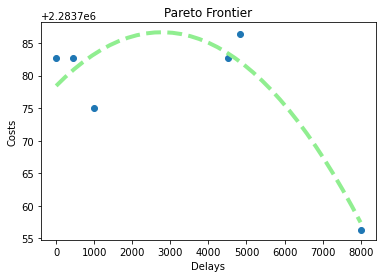

In [58]:
plt.scatter(obj2,obj1)
plt.xlabel("Delays")
plt.ylabel("Costs")

val = []
deg = 2
m = np.polyfit(obj2,obj1,deg = deg)
for i in obj2:
    val.append(0)
    for j in range(deg+1):
        val[-1] = val[-1] + m[j]*(i**(deg-j))
from scipy.interpolate import make_interp_spline
X_Y_Spline = make_interp_spline(obj2, val)
X_ = np.linspace(min(obj2), max(obj2), 35)
Y_ = X_Y_Spline(X_)

plt.plot(X_, Y_, color="lightgreen", linestyle ="dashed", linewidth = 4)
plt.title("Pareto Frontier")